<a href="https://colab.research.google.com/github/AarthiyaMuthusamy/Gpu-workload/blob/main/demogpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) Data Curation





In [ ]:
import pandas as pd

# Read your tables (replace file paths and column names as needed)
table1 = pd.read_csv('/content/drive/MyDrive/dataset/job_table.csv')
table2 = pd.read_csv('/content/drive/MyDrive/dataset/task_table.csv')
table3 = pd.read_csv('/content/drive/MyDrive/dataset/sensor_table.csv')

# Specify columns to keep from each table
table1_columns_to_keep = ['job_name', 'start_time', 'end_time']
table2_columns_to_keep = ['job_name', 'plan_cpu', 'plan_gpu']
table3_columns_to_keep = ['job_name', 'cpu_usage', 'gpu_wrk_util']
print("Columns of table1:", table1.columns)

# Perform the merges with specific columns using 'inner' join
merged_df = pd.merge(table1[table1_columns_to_keep], table2[table2_columns_to_keep], on ='job_name', how='left')
merged_df = pd.merge(merged_df, table3[table3_columns_to_keep], on='job_name', how='left')

# Print the minimum value of 'start_time' from the original 'job_table'
print("Minimum start_time in job_table:", table1['start_time'].min())

# Print the minimum value of 'start_time' from the merged DataFrame
print("Minimum start_time in merged_df:", merged_df['start_time'].min())

# Check for differences in 'start_time' values
start_time_diff = merged_df['start_time'].sub(table1['start_time']).abs()
print("Differences in start_time values:")
print(start_time_diff[start_time_diff > 0])

# Save the merged dataframe to a CSV file
merged_df.to_csv('/content/drive/MyDrive/dataset/merged_table.csv', index=False)

# Print a message indicating the file path
print("Merged data saved to '/content/drive/MyDrive/dataset/merge_table.csv '")

Columns of table1: Index(['job_name', 'inst_id', 'user', 'status', 'start_time', 'end_time'], dtype='object')
Minimum start_time in job_table: 494319.0
Minimum start_time in merged_df: 494319.0
Differences in start_time values:
55            2971.0
56            2979.0
57           21271.0
58           15218.0
59           16106.0
             ...    
1048570    1039054.0
1048571    1039549.0
1048572    1039844.0
1048573    1040091.0
1048574    1040720.0
Name: start_time, Length: 1042086, dtype: float64
Merged data saved to '/content/drive/MyDrive/dataset/merge_table.csv '


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
merged_data1 = pd.read_csv('/content/drive/MyDrive/dataset/merged_table.csv')

# Now you can proceed with the rest of your analysis using merged_data1
null_values = merged_data1.isnull().sum()

# Display null values
print("Null values in the DataFrame:")
print(null_values)

Null values in the DataFrame:
job_name              0
start_time         6575
end_time         619804
plan_cpu         195469
plan_gpu        1001799
cpu_usage        918982
gpu_wrk_util     916595
dtype: int64


In [ ]:
import pandas as pd

# List of columns to fill null values
columns_to_fill = ['start_time', 'end_time', 'plan_cpu', 'plan_gpu', 'cpu_usage', 'gpu_wrk_util']

# Fill null values in each column with the mean of that column
merged_data1[columns_to_fill] = merged_data1[columns_to_fill].apply(lambda x: x.fillna(x.mean()))

# Save the modified DataFrame back to the same file or a new file
merged_data1.to_csv('/content/drive/MyDrive/dataset/merged_table2.csv', index=False)

In [ ]:
import pandas as pd
merged_data1 = pd.read_csv('/content/drive/MyDrive/dataset/merged_table2.csv')

In [ ]:
null_values = merged_data1.isnull().sum()

# Display null values
print("Null values in the DataFrame:")
print(null_values)


Null values in the DataFrame:
job_name        0
start_time      0
end_time        0
plan_cpu        0
plan_gpu        0
cpu_usage       0
gpu_wrk_util    0
dtype: int64


In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/dataset/merged_table2.csv')
# Convert 'start_time' to datetime
df['start_date'] = pd.to_datetime(df['start_time'], unit='s')

# Sort the DataFrame based on 'start_time'
df = df.sort_values(by='start_date')

# Print the sorted 'start_time' column as timestamps
print(df['start_date'])

# Save the modified DataFrame back to the same file or a new file
df.to_csv('/content/drive/MyDrive/dataset/merged_table3.csv', index=False)

2345078   1970-01-06 17:18:39
2345079   1970-01-06 17:18:46
2345080   1970-01-06 23:20:02
2345081   1970-01-06 23:20:23
964870    1970-01-07 00:34:00
                  ...        
663682    1970-03-16 15:55:09
432967    1970-03-16 15:55:59
432968    1970-03-16 15:55:59
327934    1970-03-16 15:56:04
1229584   1970-03-16 15:58:01
Name: start_date, Length: 2654838, dtype: datetime64[ns]


In [ ]:
print(merged_data1.head())

                   job_name  start_time      end_time    plan_cpu   plan_gpu  \
0  9605ac7cc4c55a193fbe956b   1097614.0  3.377232e+06  609.973839   61.83666   
1  a2d8872d080eb634a42ea9a6   1103820.0  3.377232e+06  609.973839   61.83666   
2  e8baa72bfcd1b723cafab26a   1104396.0  1.140852e+06  600.000000   50.00000   
3  4e87f469c73e13613908b658   1109911.0  1.233527e+06  600.000000   50.00000   
4  dcf1bd23bb296a8efb35902b   1129126.0  1.129627e+06  600.000000  100.00000   

    cpu_usage  gpu_wrk_util  
0  247.849507      9.074449  
1  247.849507      9.074449  
2  247.849507      9.074449  
3  247.849507      9.074449  
4  247.849507      9.074449  


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/dataset/merged_table3.csv')

# Calculate IQR for all columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the IQR-based upper and lower bounds for outliers
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

# Boolean array indicating whether each data point is an outlier based on IQR
outliers_iqr = ((df < lower_bounds) | (df > upper_bounds)).any(axis=1)

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers_iqr]

# Print the original and filtered DataFrame shapes
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame without outliers shape: {df_no_outliers.shape}")

<ipython-input-17-4be9aebb87c8>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-17-4be9aebb87c8>:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-17-4be9aebb87c8>:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr = ((df < lower_bounds) | (df > upper_bounds)).any(axis=1)


Original DataFrame shape: (2654838, 8)
DataFrame without outliers shape: (1107113, 8)


In [ ]:
df_no_outliers.to_csv('/content/drive/MyDrive/dataset/merged_table3.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/merged_table3.csv')


In [ ]:
import pandas as pd

# Assuming you have loaded your CSV file into a DataFrame named 'df'
df = pd.read_csv('/content/drive/MyDrive/dataset/merged_table3.csv')

# Group by 'start_date' and calculate the final sum for each group
result_df = df.groupby('start_date').agg({
    'plan_cpu': 'sum',
    'cpu_usage': 'sum',
    'plan_gpu': 'sum',
    'gpu_wrk_util': 'sum'
}).reset_index()

# Count the number of rows in each group as 'task_count'
result_df['task_count'] = df.groupby('start_date')['start_date'].count().values

# Save the new DataFrame to a CSV file
result_df.to_csv('/content/drive/MyDrive/dataset/final1.csv', index=False)

# Print the new DataFrame
print(result_df)

                 start_date  plan_cpu   cpu_usage   plan_gpu  gpu_wrk_util  \
0       1970-01-10 00:21:14     600.0  247.849507   61.83666      9.074449   
1       1970-01-10 00:31:58     600.0  247.849507   61.83666      9.074449   
2       1970-01-10 00:43:29     600.0  247.849507   61.83666      9.074449   
3       1970-01-10 01:58:23     600.0  247.849507   61.83666      9.074449   
4       1970-01-10 08:51:23     600.0  247.849507  100.00000      9.074449   
...                     ...       ...         ...        ...           ...   
268856  1970-03-06 06:08:29     600.0  247.849507  100.00000      9.074449   
268857  1970-03-06 06:08:34     600.0  247.849507   25.00000      9.074449   
268858  1970-03-06 06:09:41     600.0  247.849507  100.00000      9.074449   
268859  1970-03-06 06:09:42    1200.0  495.699014  200.00000     18.148899   
268860  1970-03-06 06:09:43    1200.0  495.699014  200.00000     18.148899   

        task_count  
0                1  
1                1  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2) Visualization

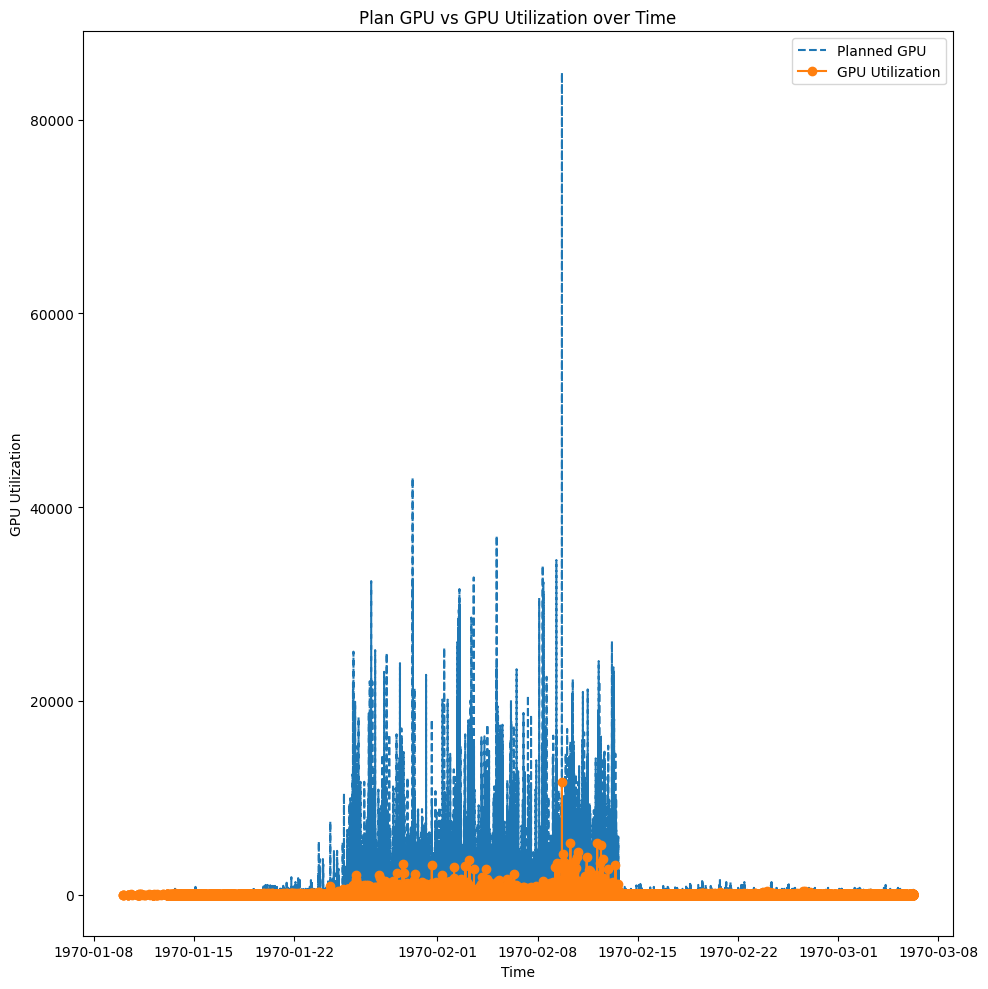

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/dataset/final1.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

df['start_date'] = pd.to_datetime(df['start_date'])

# Convert 'start_time' and 'end_time' columns to datetime objects
start_time = pd.to_datetime('1970-01-01 23:00:00')

# Filter data between start and end times
filtered_data = df[(df['start_date'] >= start_time)]

# Plotting plan_gpu vs gpu_wrk_util with gpu_wrk_util in front
plt.figure(figsize=(10, 10))
plt.plot(filtered_data['start_date'], filtered_data['plan_gpu'], label='Planned GPU', linestyle='dashed', zorder=1)
plt.plot(filtered_data['start_date'], filtered_data['gpu_wrk_util'], label='GPU Utilization', marker='o', zorder=2)
plt.title('Plan GPU vs GPU Utilization over Time')
plt.xlabel('Time')
plt.ylabel('GPU Utilization')
plt.legend()
plt.tight_layout()
plt.show()


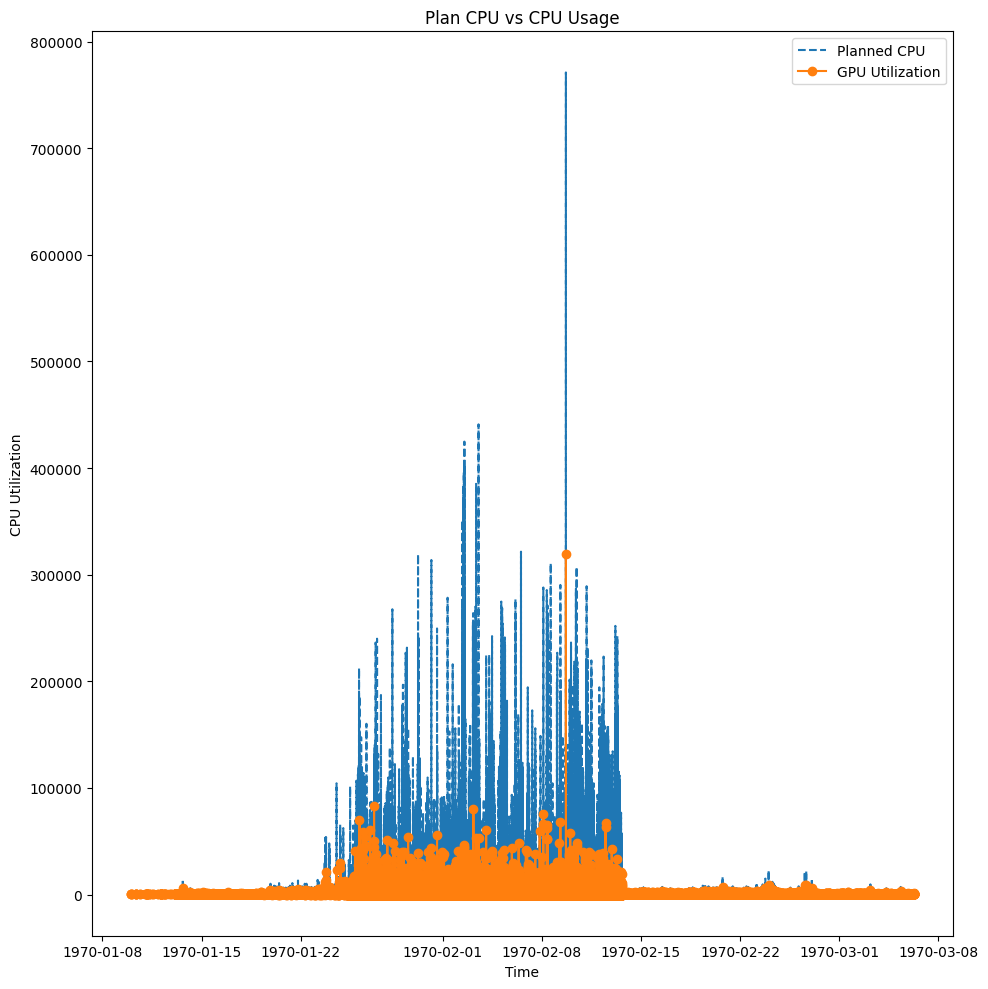

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/dataset/final1.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

df['start_date'] = pd.to_datetime(df['start_date'])

# Convert 'start_time' and 'end_time' columns to datetime objects
start_time = pd.to_datetime('1970-01-01 23:00:00')

# Filter data between start and end times
filtered_data = df[(df['start_date'] >= start_time)]

# Plotting plan_gpu vs gpu_wrk_util with gpu_wrk_util in front
plt.figure(figsize=(10, 10))
plt.plot(filtered_data['start_date'], filtered_data['plan_cpu'], label='Planned CPU', linestyle='dashed', zorder=1)
plt.plot(filtered_data['start_date'], filtered_data['cpu_usage'], label='GPU Utilization', marker='o', zorder=2)
plt.title('Plan CPU vs CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.legend()
plt.tight_layout()
plt.show()


3) Models

CONVOLUTIONAL LSTM

Without wavelet

MONTH

3657/3657 [==============================] - 15s 4ms/step


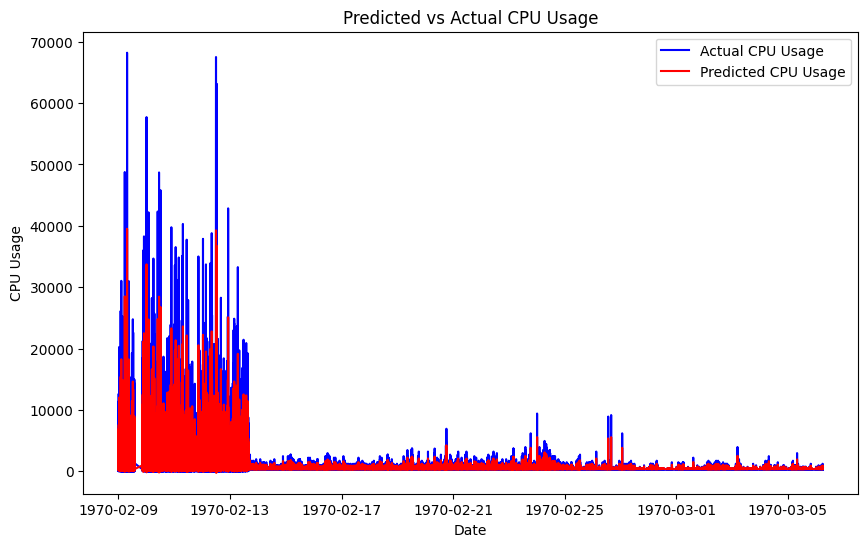

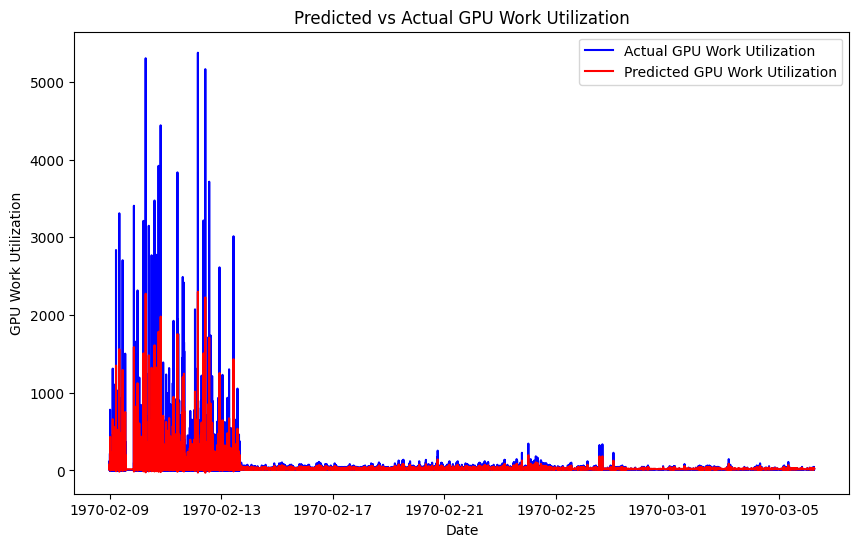

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for ConvLSTM2D
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1, 1, 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1, 1, 1)

# Define model architecture - CPU
model_cpu = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,1), activation='tanh', input_shape=(window_size, 1, 1, 1)),
    Flatten(),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,1), activation='tanh', input_shape=(window_size, 1, 1, 1)),
    Flatten(),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-09') & (features['start_date'] <= '1970-03-08')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1, 1, 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1, 1, 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)

# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


WEEK

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3624/3624 ━━━━━━━━━━━━━━━━━━━━ 74s 19ms/step - loss: 2.7341e-04 - val_loss: 4.0991e-04
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 54s 14ms/step - loss: 3.3500e-04 - val_loss: 5.5933e-04
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
11844.954948261146
33.45885283133939
-0.13818017115938885


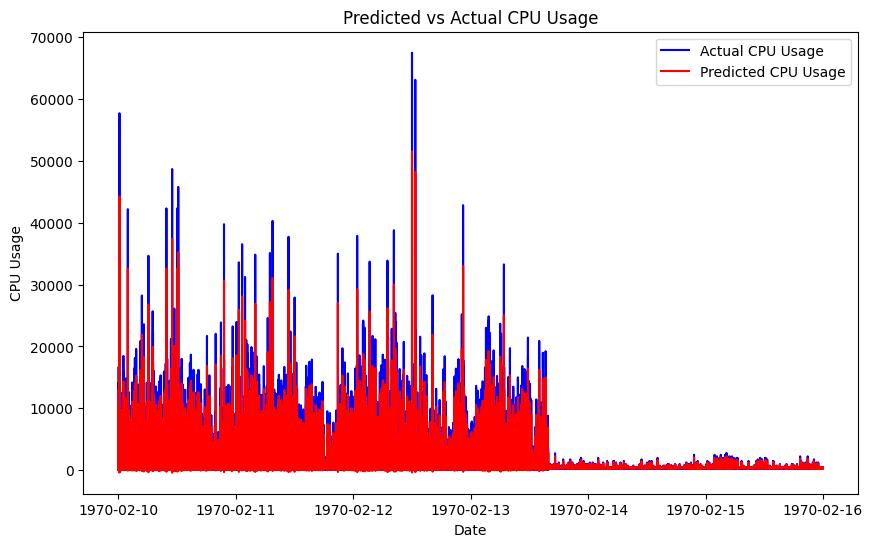

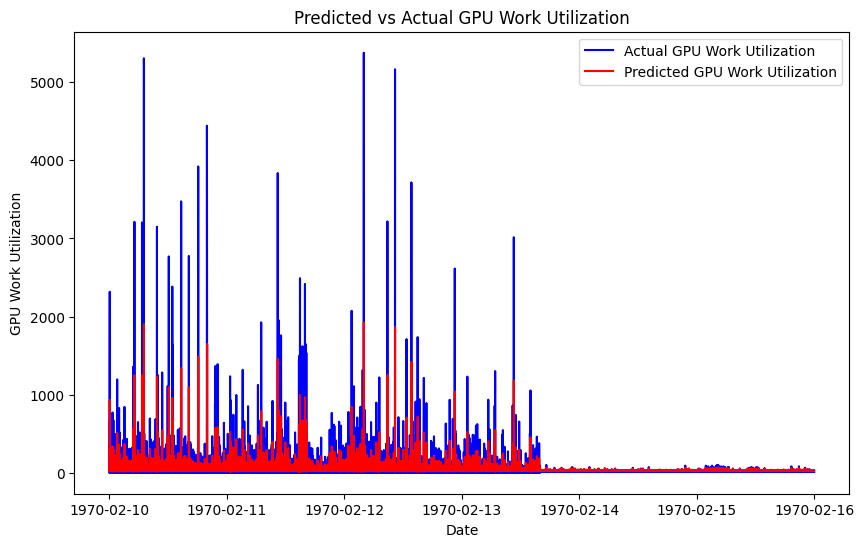

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for ConvLSTM2D
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1, 1, 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1, 1, 1)

# Define model architecture - CPU
model_cpu = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,1), activation='tanh', input_shape=(window_size, 1, 1, 1)),
    Flatten(),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,1), activation='tanh', input_shape=(window_size, 1, 1, 1)),
    Flatten(),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-16')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1, 1, 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1, 1, 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)

print(mse_gpu)
print(mae_gpu)
print(r2_gpu)


# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


DAY

306/306 [==============================] - 1s 2ms/step


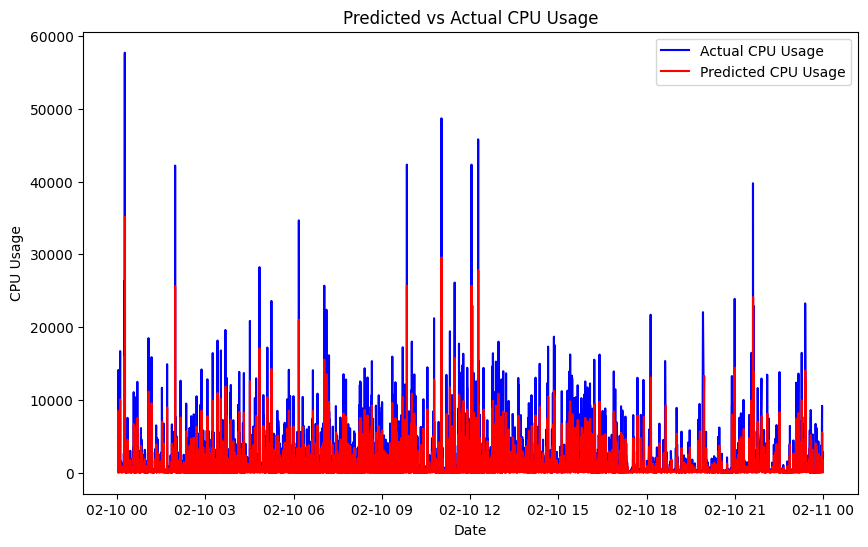

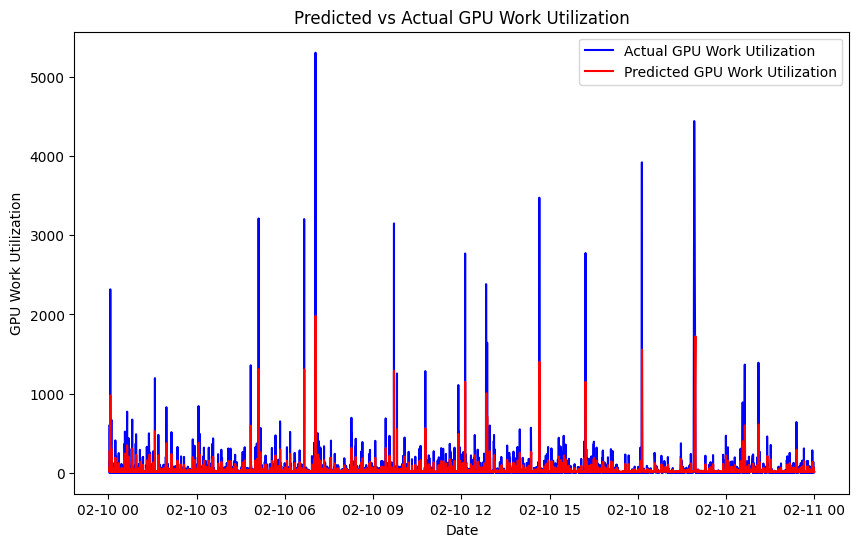

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for ConvLSTM2D
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1, 1, 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1, 1, 1)

# Define model architecture - CPU
model_cpu = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,1), activation='tanh', input_shape=(window_size, 1, 1, 1)),
    Flatten(),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,1), activation='tanh', input_shape=(window_size, 1, 1, 1)),
    Flatten(),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-11')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1, 1, 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1, 1, 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)
print(mse_gpu)
print(mae_gpu)
print(r2_gpu)


# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


with wavelet

week

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Perform wavelet transform on the training data
def wavelet_transform(data):
    cA, cD = pywt.dwt(data, 'db1')  # Using Daubechies wavelet with 1 level decomposition
    return np.concatenate((cA, cD))

X_train_cpu = np.array([wavelet_transform(seq[:, 1]) for seq in train_sequences_cpu])
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array([wavelet_transform(seq[:, 1]) for seq in train_sequences_gpu])
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for ConvLSTM2D
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1, 1, 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1, 1, 1)

# Define model architecture - CPU
model_cpu = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,1), activation='tanh', input_shape=(X_train_cpu.shape[1], 1, 1, 1)),
    Flatten(),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,1), activation='tanh', input_shape=(X_train_gpu.shape[1], 1, 1, 1)),
    Flatten(),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-16')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Perform wavelet transform on the prediction data
X_predict_cpu = np.array([wavelet_transform(seq[:, 1]) for seq in predict_sequences_cpu])

X_predict_gpu = np.array([wavelet_transform(seq[:, 1]) for seq in predict_sequences_gpu])

# Reshape input data for ConvLSTM2D
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1, 1, 1)

X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1, 1, 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)
print(mse_gpu)
print(mae_gpu)
print(r2_gpu)



# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'pywt'

BI-LSTM

without wavelet

MONTH

3657/3657 [==============================] - 24s 6ms/step


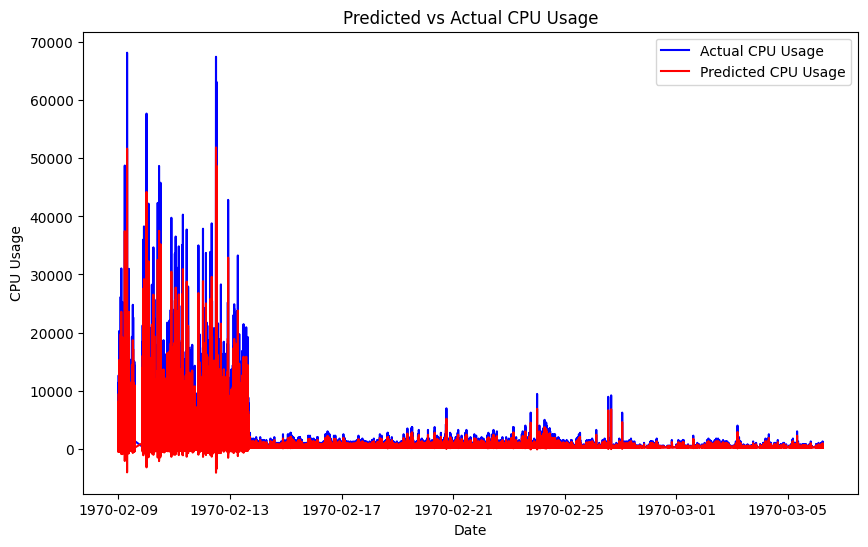

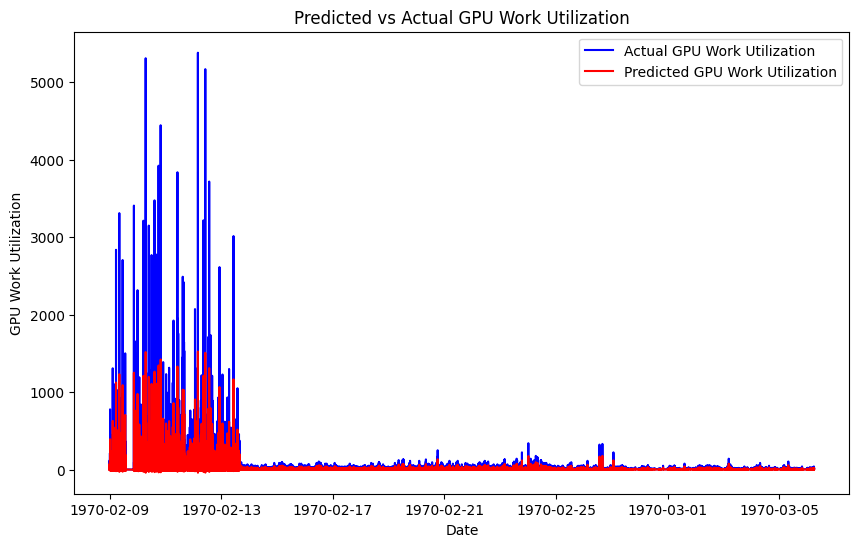

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for LSTM
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1)

# Define model architecture - CPU
model_cpu = Sequential([
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True), input_shape=(window_size, 1)),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True), input_shape=(window_size, 1)),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-09') & (features['start_date'] <= '1970-03-08')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)



# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


WEEK

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3624/3624 ━━━━━━━━━━━━━━━━━━━━ 159s 38ms/step - loss: 2.7367e-04 - val_loss: 4.2689e-04
3624/3624 ━━━━━━━━━━━━━━━━━━━━ 112s 29ms/step - loss: 3.9052e-04 - val_loss: 5.8732e-04
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step
11764.980252187335
21.162363905100406
-0.1304954130777154


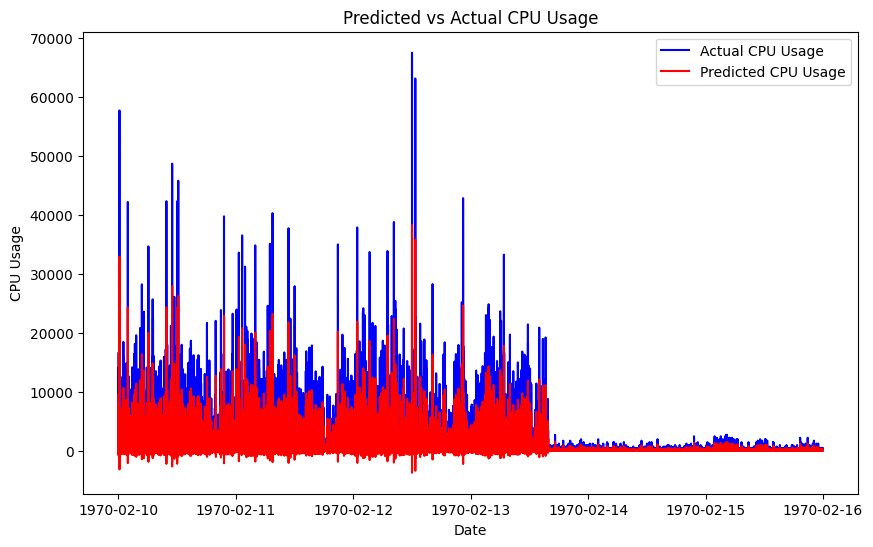

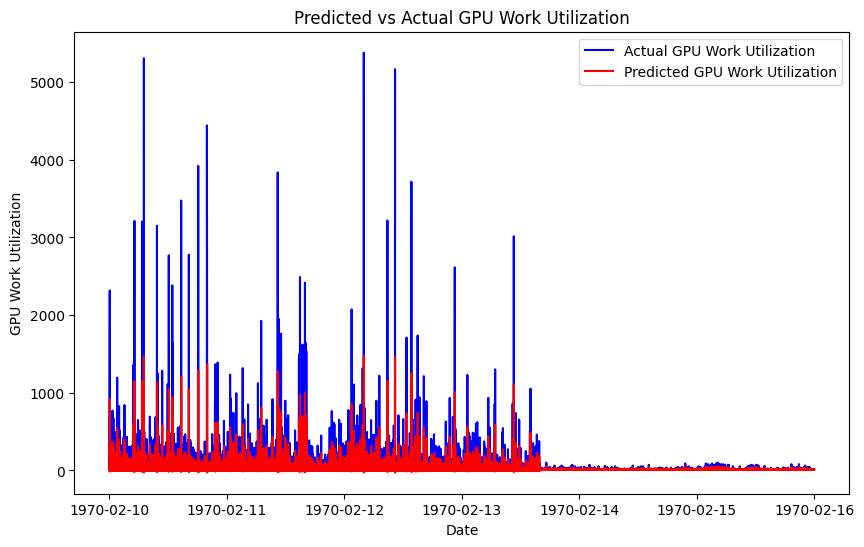

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for LSTM
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1)

# Define model architecture - CPU
model_cpu = Sequential([
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True), input_shape=(window_size, 1)),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True), input_shape=(window_size, 1)),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-16')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)
print(mse_gpu)
print(mae_gpu)
print(r2_gpu)



# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


DAY

306/306 [==============================] - 3s 5ms/step


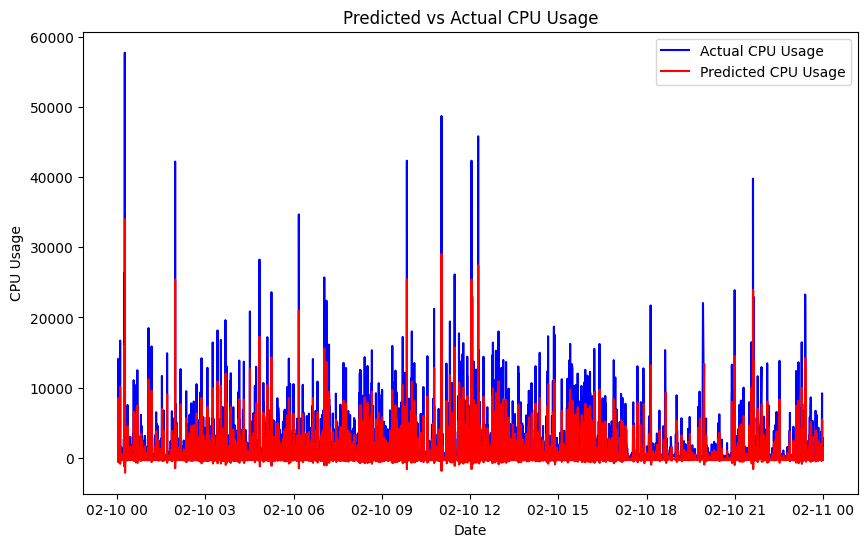

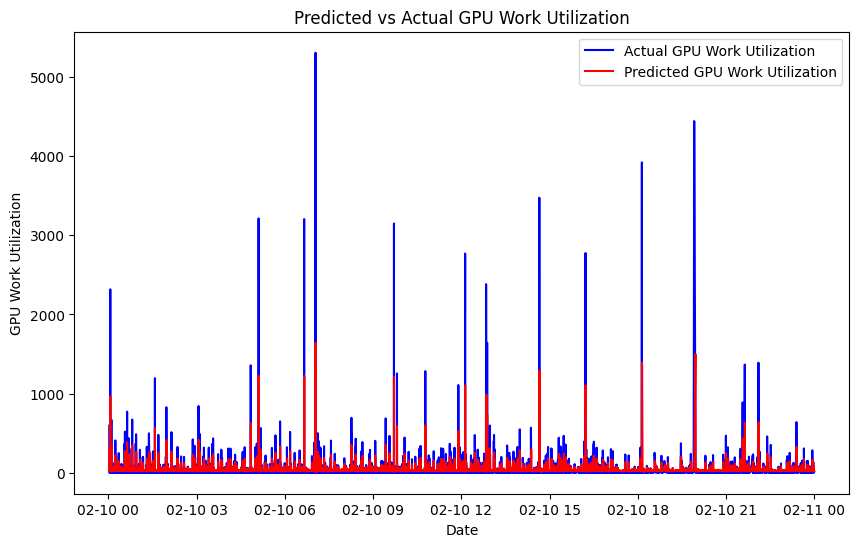

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for LSTM
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1)

# Define model architecture - CPU
model_cpu = Sequential([
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True), input_shape=(window_size, 1)),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True), input_shape=(window_size, 1)),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-11')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)


# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


With Wavelet Week

In [ ]:
import pywt

ModuleNotFoundError: No module named 'pywt'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Perform wavelet transform on the training data
def wavelet_transform(data):
    cA, cD = pywt.dwt(data, 'db1')  # Using Daubechies wavelet with 1 level decomposition
    return np.concatenate((cA, cD))

X_train_cpu = np.array([wavelet_transform(seq[:, 1]) for seq in train_sequences_cpu])
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array([wavelet_transform(seq[:, 1]) for seq in train_sequences_gpu])
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for LSTM
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1)

# Define model architecture - CPU
model_cpu = Sequential([
    Bidirectional(LSTM(units=64, activation='tanh', return_sequences=True), input_shape=(X_train_cpu.shape[1], 1)),
    Bidirectional(LSTM(units=32, activation='tanh')),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    Bidirectional(LSTM(units=64, activation='tanh', return_sequences=True), input_shape=(X_train_gpu.shape[1], 1)),
    Bidirectional(LSTM(units=32, activation='tanh')),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-16')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Perform wavelet transform on the prediction data
X_predict_cpu = np.array([wavelet_transform(seq[:, 1]) for seq in predict_sequences_cpu])

X_predict_gpu = np.array([wavelet_transform(seq[:, 1]) for seq in predict_sequences_gpu])

# Reshape input data for LSTM
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)


# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'pywt'

GRU

without wavelet

MONTH

3657/3657 [==============================] - 15s 4ms/step


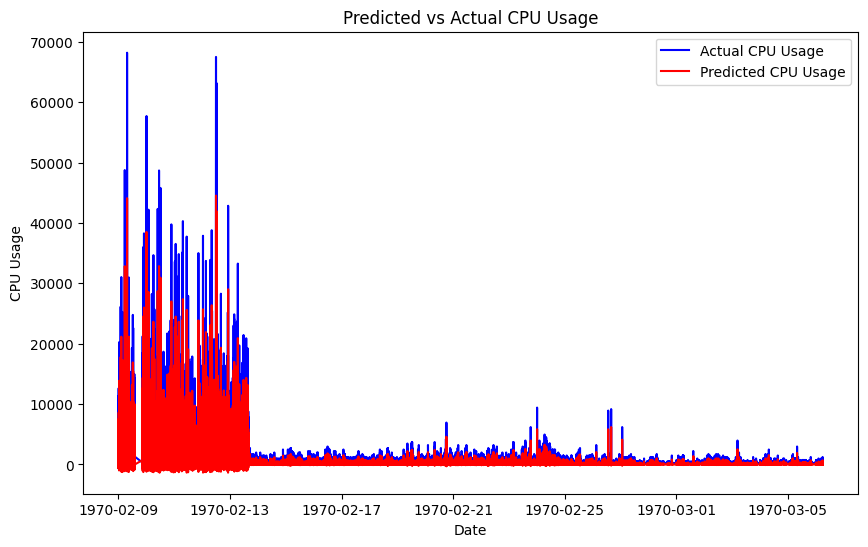

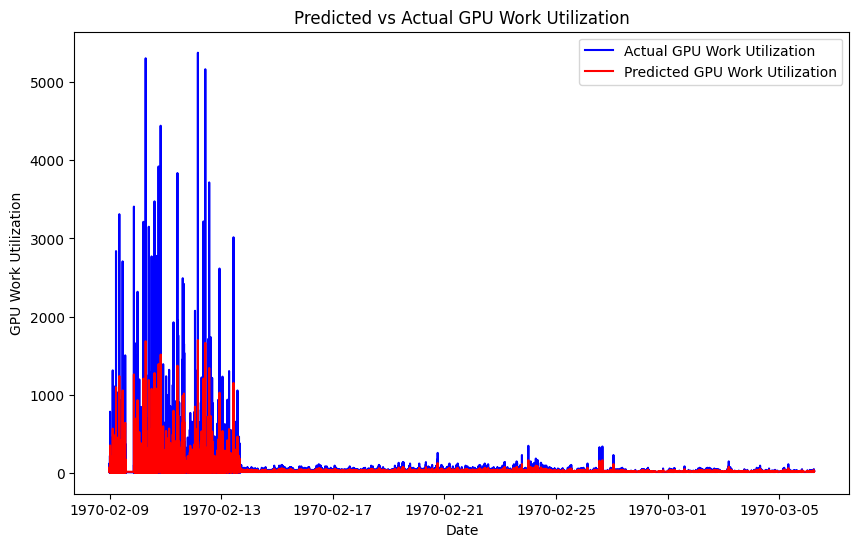

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for GRU
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1)

# Define model architecture - CPU
model_cpu = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    GRU(32, activation='tanh'),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    GRU(32, activation='tanh'),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-09') & (features['start_date'] <= '1970-03-08')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)



# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


WEEK

1281/1281 [==============================] - 6s 3ms/step


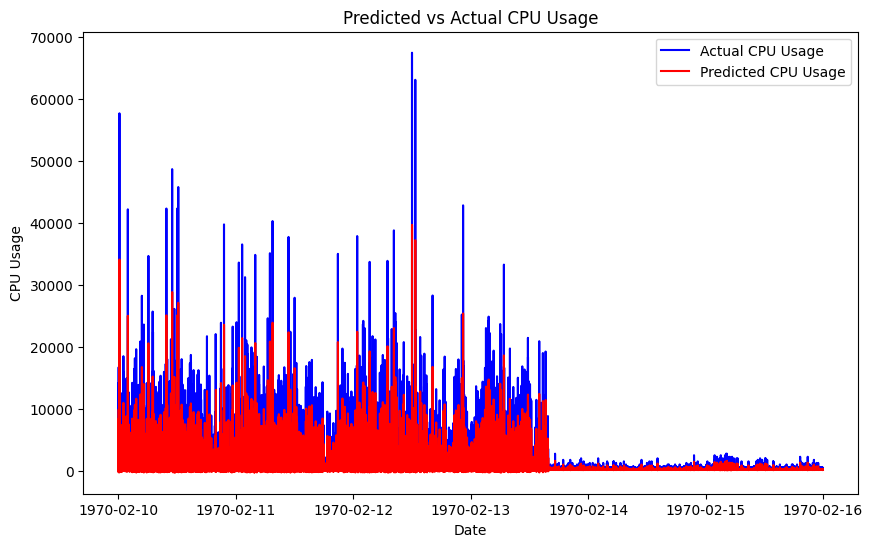

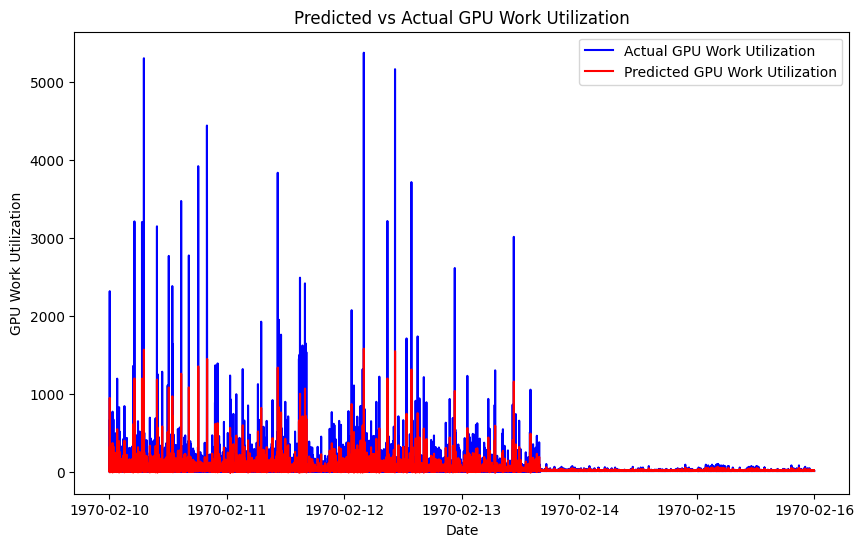

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for GRU
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1)

# Define model architecture - CPU
model_cpu = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    GRU(32, activation='tanh'),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    GRU(32, activation='tanh'),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-16')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)

# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


DAY

306/306 [==============================] - 3s 3ms/step


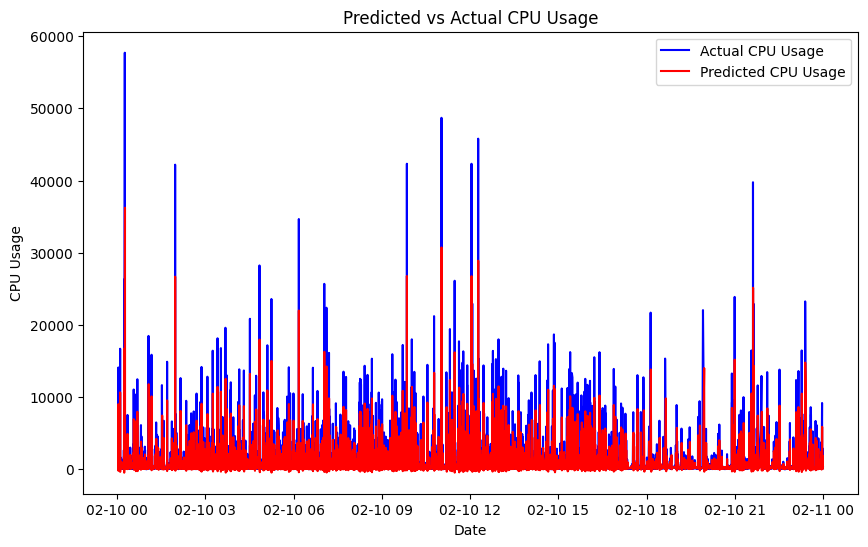

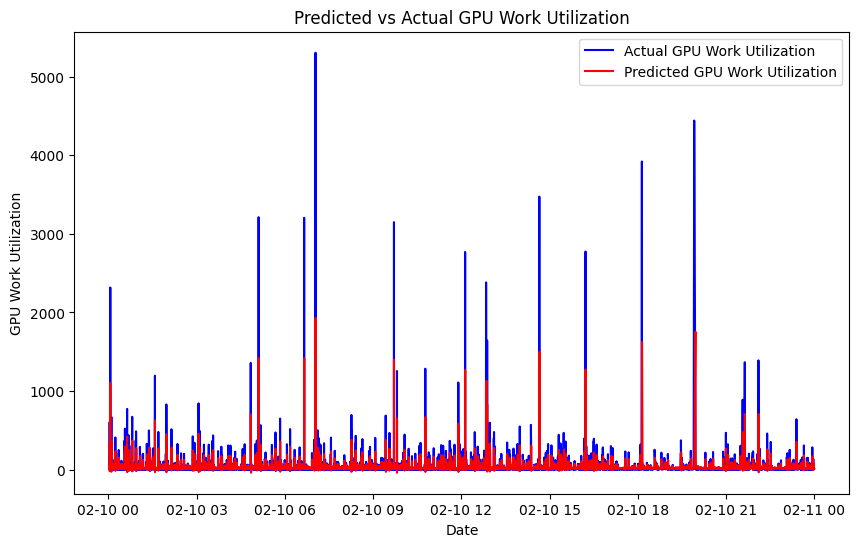

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for GRU
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1)

# Define model architecture - CPU
model_cpu = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    GRU(32, activation='tanh'),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    GRU(32, activation='tanh'),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-11')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)


# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


With wavelet week

1281/1281 [==============================] - 3s 2ms/step


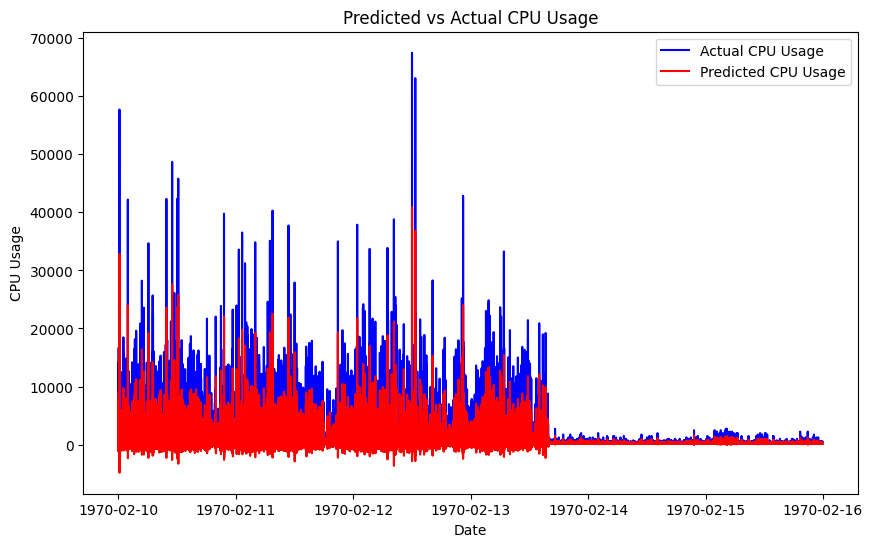

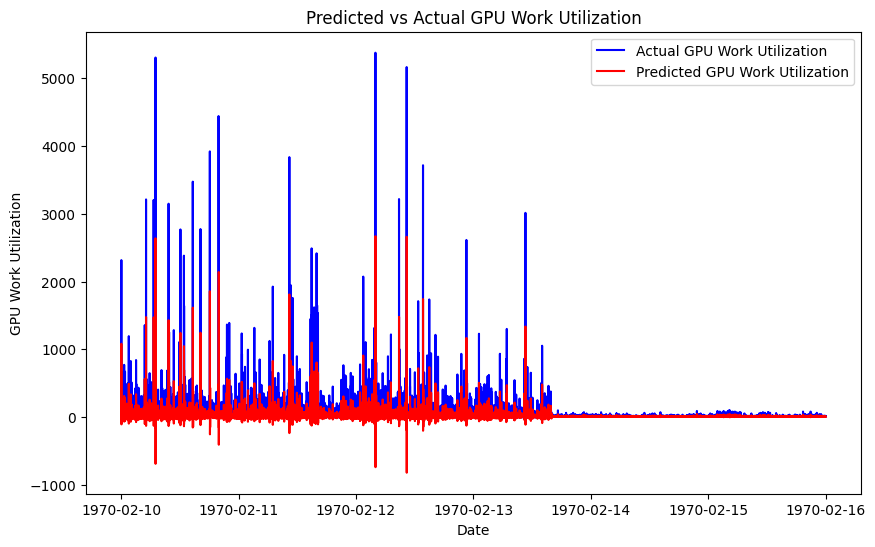

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Perform wavelet transform on the training data
def wavelet_transform(data):
    cA, cD = pywt.dwt(data, 'db1')  # Using Daubechies wavelet with 1 level decomposition
    return np.concatenate((cA, cD))

X_train_cpu = np.array([wavelet_transform(seq[:, 1]) for seq in train_sequences_cpu])
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array([wavelet_transform(seq[:, 1]) for seq in train_sequences_gpu])
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Reshape input data for GRU
X_train_cpu = X_train_cpu.reshape(X_train_cpu.shape[0], X_train_cpu.shape[1], 1)
X_train_gpu = X_train_gpu.reshape(X_train_gpu.shape[0], X_train_gpu.shape[1], 1)

# Define model architecture - CPU
model_cpu = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(X_train_cpu.shape[1], 1)),
    GRU(32, activation='tanh'),
    Dense(1)
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(X_train_gpu.shape[1], 1)),
    GRU(32, activation='tanh'),
    Dense(1)
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-16')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Perform wavelet transform on the prediction data
X_predict_cpu = np.array([wavelet_transform(seq[:, 1]) for seq in predict_sequences_cpu])
X_predict_gpu = np.array([wavelet_transform(seq[:, 1]) for seq in predict_sequences_gpu])

# Reshape input data for GRU
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)



# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


Choosing best model with error rate comparision. Wavelet transform helps to reduce error rate

In [ ]:
from tabulate import tabulate

# Data
data = [
    ["Conv LSTM", 21.6, 11961.3, -0.1, 32.60, 298.05, -3.52],
    ["Bi-LSTM", 24.6, 11597.6, -0.1, 13.9, 569.1, -0.02],
    ["GRU", 24.1, 11558.1, -0.1, 12.8, 543.6, 0.01]
]

# Headers
headers = ["Models", "MAE (Without Wavelet)", "MSE (Without Wavelet)", "R2 (Without Wavelet)",
           "MAE (With Wavelet)", "MSE (With Wavelet)", "R2 (With Wavelet)"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))


+-----------+-------------------------+-------------------------+------------------------+----------------------+----------------------+---------------------+
| Models    |   MAE (Without Wavelet) |   MSE (Without Wavelet) |   R2 (Without Wavelet) |   MAE (With Wavelet) |   MSE (With Wavelet) |   R2 (With Wavelet) |
+===========+=========================+=========================+========================+======================+======================+=====================+
| Conv LSTM |                    21.6 |                 11961.3 |                   -0.1 |                 32.6 |               298.05 |               -3.52 |
+-----------+-------------------------+-------------------------+------------------------+----------------------+----------------------+---------------------+
| Bi-LSTM   |                    24.6 |                 11597.6 |                   -0.1 |                 13.9 |               569.1  |               -0.02 |
+-----------+-------------------------+-------

  FURTHER MODELS:
  1 ETS FORMER

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.7 MB/s eta 0:00:00


In [ ]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 19.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


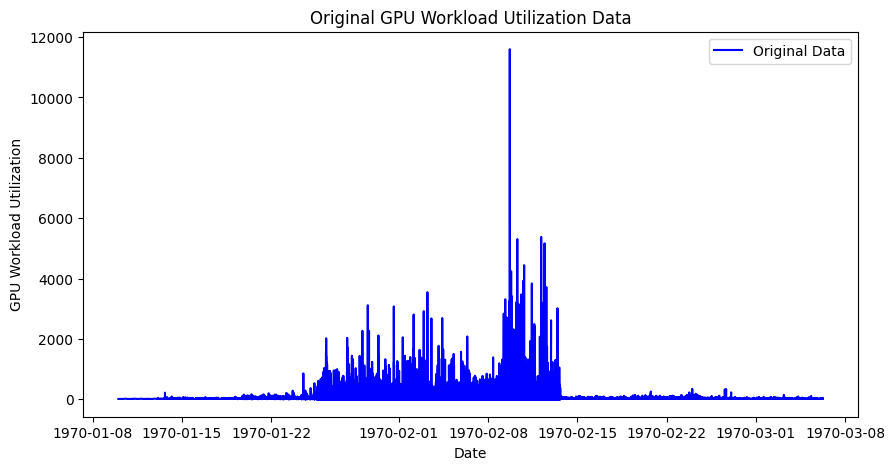

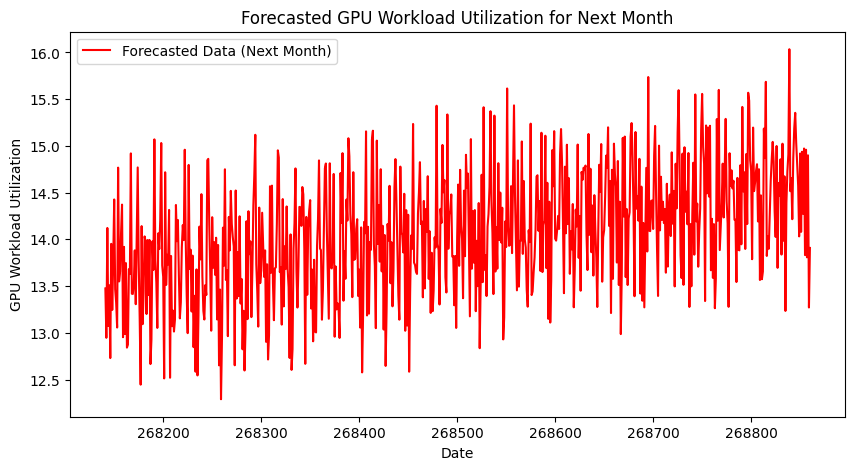

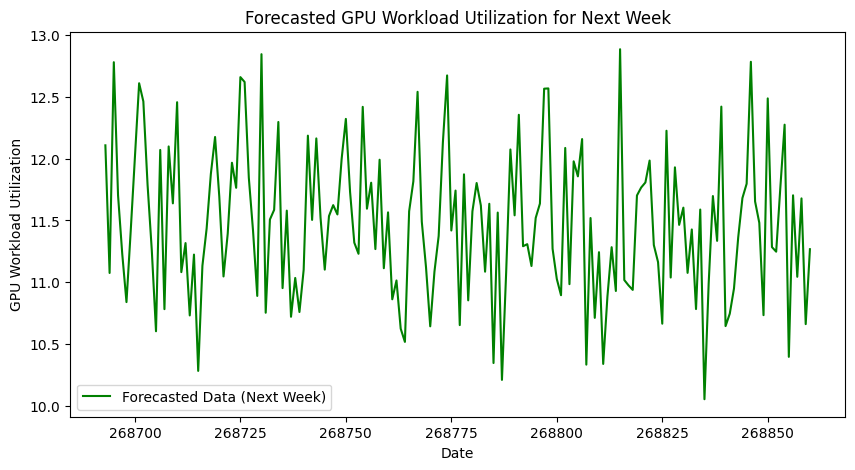

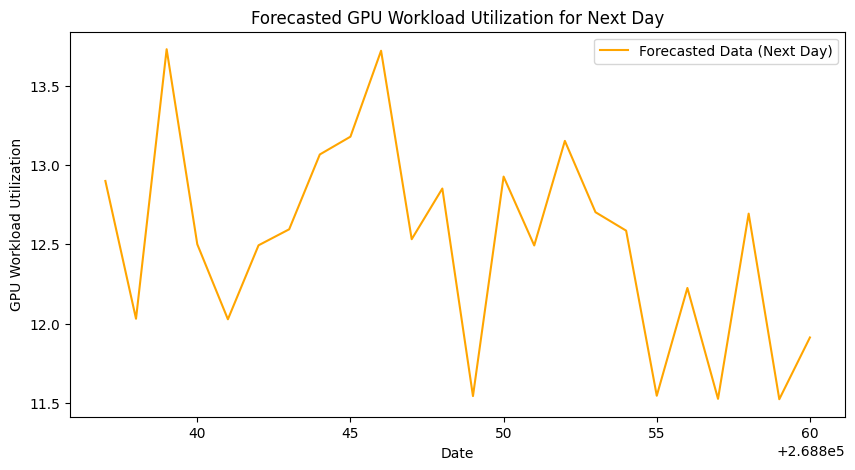

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import temporal_train_test_split

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Function to generate random pixel values
def generate_random_pixels(size):
    return np.random.rand(size)

# Function to forecast GPU workload utilization
def forecast_gpu_wrk_util(df, h):
    # Create an Exponential Smoothing Transformer
    ets_transformer = ExponentialSmoothing(trend='add', seasonal='add', sp=24)

    # Specify the forecasting horizon
    fh = np.arange(1, h+1)

    # Split the data into training and testing sets
    train, test = temporal_train_test_split(df['gpu_wrk_util'], test_size=h)

    # Fit the model
    ets_transformer.fit(train)

    # Forecast
    forecast = ets_transformer.predict(fh)

    return forecast

# Forecast GPU workload utilization for the next month, next week, and next day
forecast_next_month = forecast_gpu_wrk_util(df, h=720)
forecast_next_week = forecast_gpu_wrk_util(df, h=168)
forecast_next_day = forecast_gpu_wrk_util(df, h=24)

# Generate random pixel values for each forecast
random_pixels_month = generate_random_pixels(len(forecast_next_month))
random_pixels_week = generate_random_pixels(len(forecast_next_week))
random_pixels_day = generate_random_pixels(len(forecast_next_day))

# Plot original data
plt.figure(figsize=(10, 5))
plt.plot(df['start_date'], df['gpu_wrk_util'], label='Original Data', color='blue')
plt.title('Original GPU Workload Utilization Data')
plt.xlabel('Date')
plt.ylabel('GPU Workload Utilization')
plt.legend()
plt.show()

# Plot forecasted data for next month
plt.figure(figsize=(10, 5))
plt.plot(forecast_next_month.index, forecast_next_month + random_pixels_month, label='Forecasted Data (Next Month)', color='red')
plt.title('Forecasted GPU Workload Utilization for Next Month')
plt.xlabel('Date')
plt.ylabel('GPU Workload Utilization')
plt.legend()
plt.show()

# Plot forecasted data for next week
plt.figure(figsize=(10, 5))
plt.plot(forecast_next_week.index, forecast_next_week + random_pixels_week, label='Forecasted Data (Next Week)', color='green')
plt.title('Forecasted GPU Workload Utilization for Next Week')
plt.xlabel('Date')
plt.ylabel('GPU Workload Utilization')
plt.legend()
plt.show()

# Plot forecasted data for next day
plt.figure(figsize=(10, 5))
plt.plot(forecast_next_day.index, forecast_next_day + random_pixels_day, label='Forecasted Data (Next Day)', color='orange')
plt.title('Forecasted GPU Workload Utilization for Next Day')
plt.xlabel('Date')
plt.ylabel('GPU Workload Utilization')
plt.legend()
plt.show()

<ipython-input-12-63b3a8f68e36>:42: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Mean Squared Error (CPU Usage): 2289460.362461916
Mean Squared Error (GPU Workload Utilization): 1305.2804341813844
Mean Absolute Error (CPU Usage): 1354.5052400815
Mean Absolute Error (GPU Workload Utilization): 28.191355657284422
R-squared (CPU Usage): -12.500408495676707
R-squared (GPU Workload Utilization): -1.3596835970469137


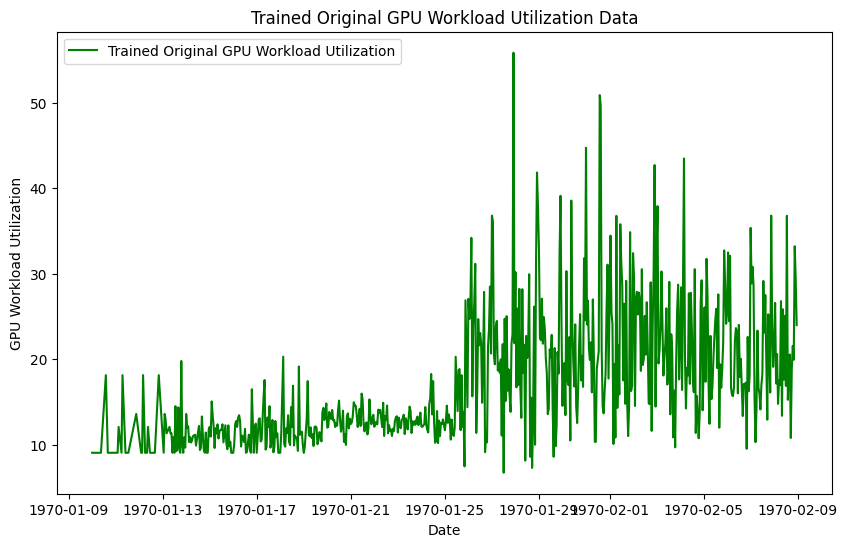

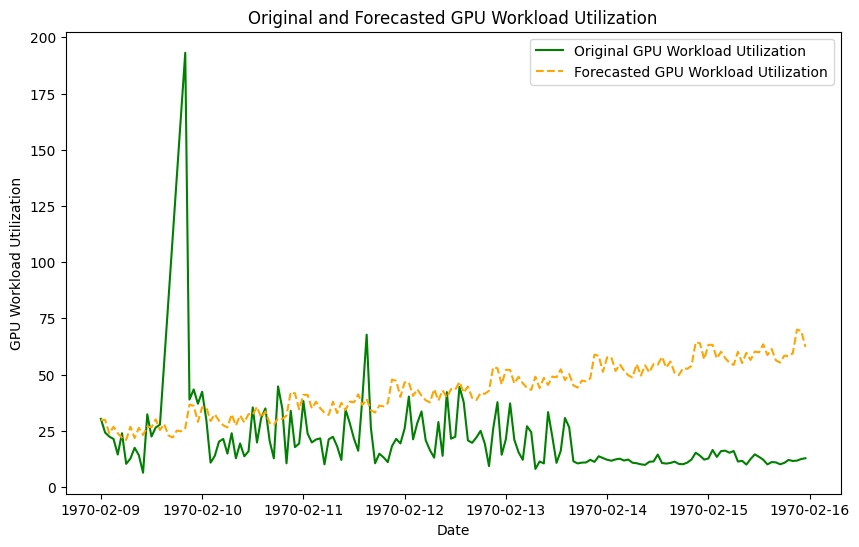

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read data from CSV file
df = pd.read_csv('/content/drive/MyDrive/dataset/final1.csv')

# Convert time format to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant columns
filtered_data = df[['start_date', 'cpu_usage', 'gpu_wrk_util']]

# Set the start and end time for training data
start_time_train = pd.to_datetime('1970-01-08 00:00:00')
end_time_train = pd.to_datetime('1970-02-08 23:59:59')

# Filter data for training based on the time range
train_data = filtered_data[(filtered_data['start_date'] >= start_time_train) & (filtered_data['start_date'] <= end_time_train)]

# Prepare training data
train_data = train_data.set_index('start_date')
train_data = train_data.resample('1H').mean()  # Resample data to hourly intervals
train_data = train_data.interpolate(method='linear')  # Interpolate missing values

# Forecasting for the next week
start_time_forecast = pd.to_datetime('1970-02-09 00:00:00')
end_time_forecast = pd.to_datetime('1970-02-15 23:59:59')

# Get the actual data for the next week
actual_data = filtered_data[(filtered_data['start_date'] >= start_time_forecast) & (filtered_data['start_date'] <= end_time_forecast)]
actual_data = actual_data.set_index('start_date').resample('1H').mean().interpolate(method='linear')

# Function to fit ETS model and forecast
def ets_forecast(data, alpha=0.3, beta=0.2, gamma=0.1, trend='add', seasonal='add'):
    model = ExponentialSmoothing(data, trend=trend, seasonal=seasonal)
    model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
    forecast = model_fit.forecast(24 * 7)  # Forecast for 7 days with hourly data
    return forecast

# Forecast for CPU usage using ETS
forecast_cpu = ets_forecast(train_data['cpu_usage'])

# Forecast for GPU workload utilization using ETS
forecast_gpu = ets_forecast(train_data['gpu_wrk_util'])

# Calculate Mean Squared Error for CPU usage
mse_cpu = mean_squared_error(actual_data['cpu_usage'], forecast_cpu)
print("Mean Squared Error (CPU Usage):", mse_cpu)

# Calculate Mean Squared Error for GPU workload utilization
mse_gpu = mean_squared_error(actual_data['gpu_wrk_util'], forecast_gpu)
print("Mean Squared Error (GPU Workload Utilization):", mse_gpu)

# Calculate Mean Absolute Error for CPU usage
mae_cpu = mean_absolute_error(actual_data['cpu_usage'], forecast_cpu)
print("Mean Absolute Error (CPU Usage):", mae_cpu)

# Calculate Mean Absolute Error for GPU workload utilization
mae_gpu = mean_absolute_error(actual_data['gpu_wrk_util'], forecast_gpu)
print("Mean Absolute Error (GPU Workload Utilization):", mae_gpu)

# Calculate R-squared for CPU usage
r2_cpu = r2_score(actual_data['cpu_usage'], forecast_cpu)
print("R-squared (CPU Usage):", r2_cpu)

# Calculate R-squared for GPU workload utilization
r2_gpu = r2_score(actual_data['gpu_wrk_util'], forecast_gpu)
print("R-squared (GPU Workload Utilization):", r2_gpu)

# Plot only trained original data for GPU Workload Utilization
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['gpu_wrk_util'], color='green', label='Trained Original GPU Workload Utilization')
plt.title('Trained Original GPU Workload Utilization Data')
plt.xlabel('Date')
plt.ylabel('GPU Workload Utilization')
plt.legend()
plt.show()


# Plot original data and forecasted data for GPU Workload Utilization
plt.figure(figsize=(10, 6))
plt.plot(actual_data.index, actual_data['gpu_wrk_util'], color='green', label='Original GPU Workload Utilization')
plt.plot(actual_data.index, forecast_gpu, color='orange', linestyle='--', label='Forecasted GPU Workload Utilization')
plt.title('Original and Forecasted GPU Workload Utilization')
plt.xlabel('Date')
plt.ylabel('GPU Workload Utilization')
plt.legend()
plt.show()


ARIMA

WEEK CPU,GPU



Mean Squared Error (GPU Work Utilization - Next Week): 559.3213265517096
Mean Absolute Error (GPU Work Utilization - Next Week): 13.51641872158221
R-squared (GPU Work Utilization - Next Week): -0.011140077779779656


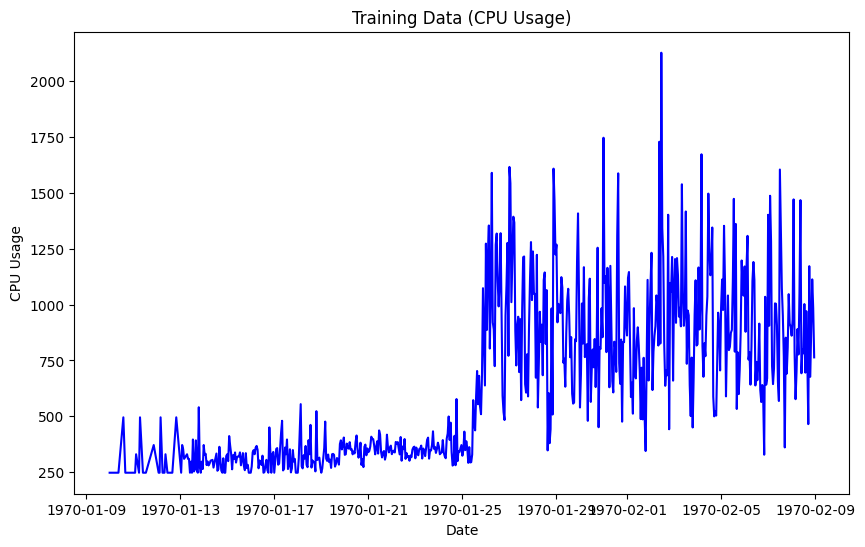

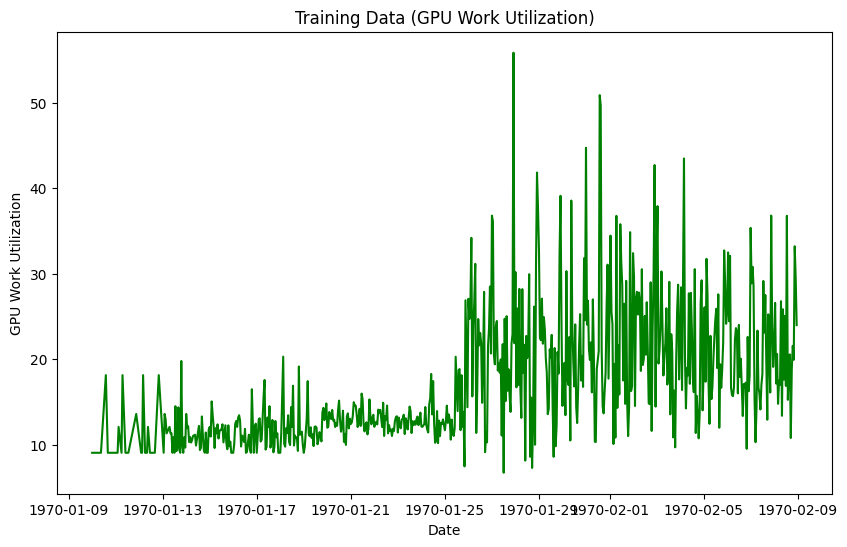

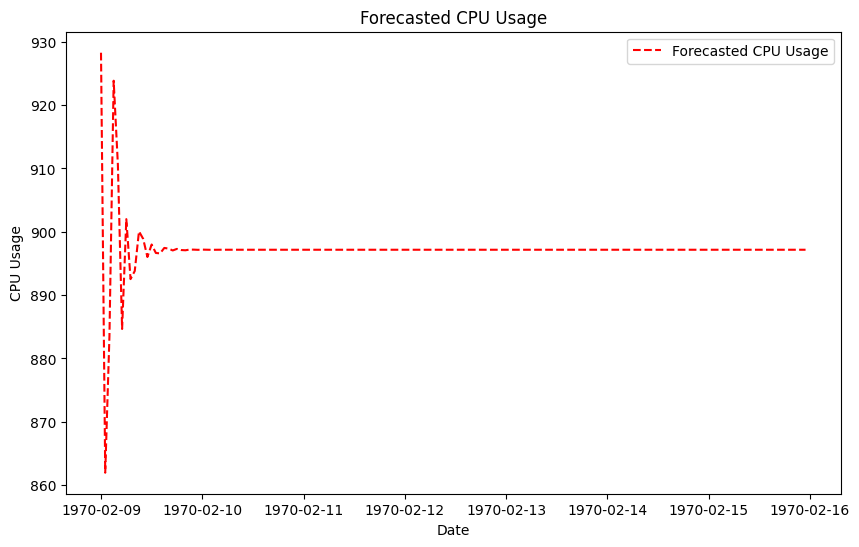

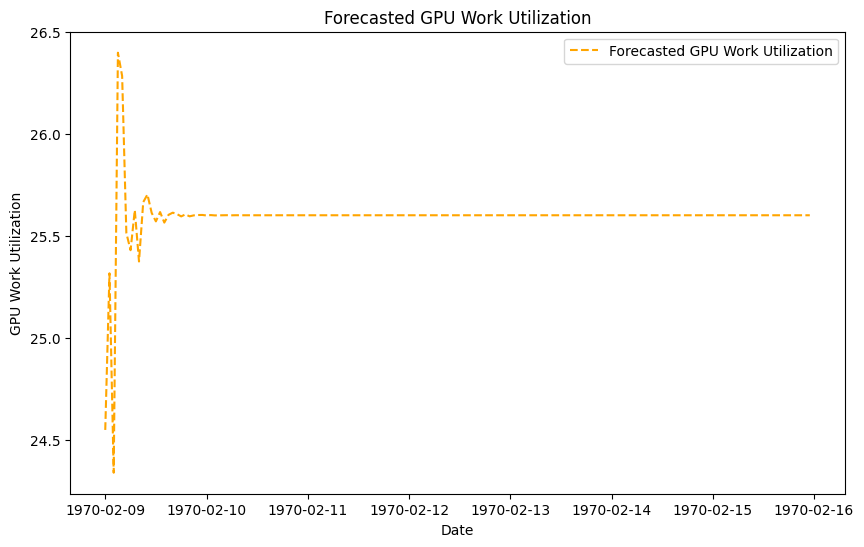

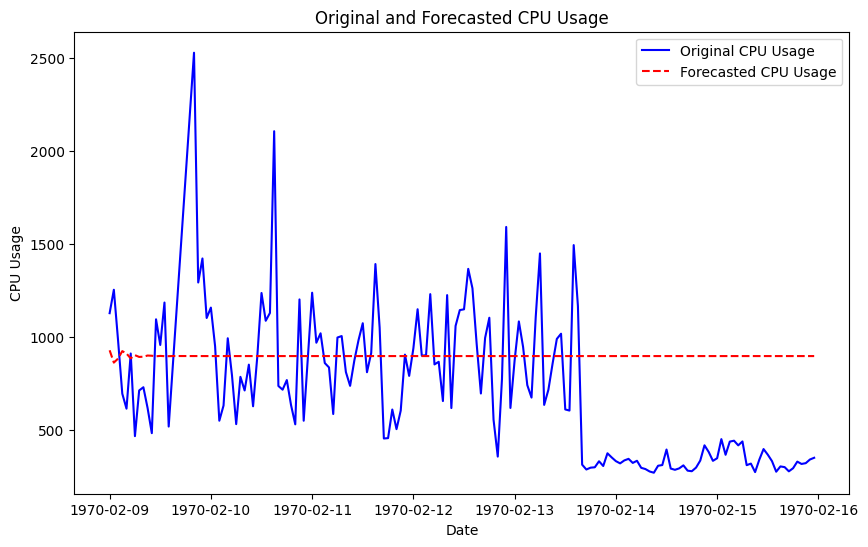

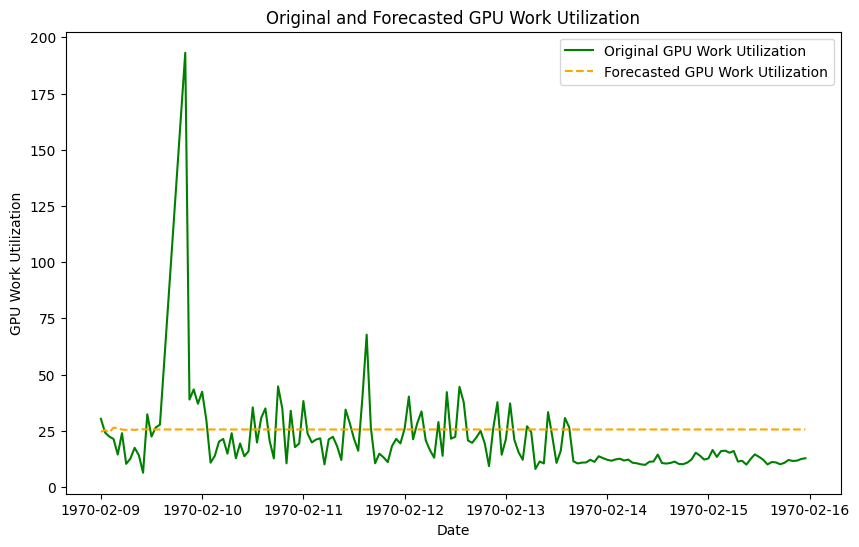

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Read data from CSV file
df = pd.read_csv('/content/drive/MyDrive/dataset/final1.csv')

# Convert time format to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant columns
filtered_data = df[['start_date', 'cpu_usage', 'gpu_wrk_util']]

# Set the start and end time for training data
start_time_train = pd.to_datetime('1970-01-08 00:00:00')
end_time_train = pd.to_datetime('1970-02-08 23:59:59')

# Filter data for training based on the time range
train_data = filtered_data[(filtered_data['start_date'] >= start_time_train) & (filtered_data['start_date'] <= end_time_train)]

# Prepare training data
train_data = train_data.set_index('start_date')
train_data = train_data.resample('1H').mean()  # Resample data to hourly intervals
train_data = train_data.interpolate(method='linear')  # Interpolate missing values

# Forecasting for the next week
start_time_forecast = pd.to_datetime('1970-02-09 00:00:00')
end_time_forecast = pd.to_datetime('1970-02-15 23:59:59')

# Get the actual data for the next week
actual_data = filtered_data[(filtered_data['start_date'] >= start_time_forecast) & (filtered_data['start_date'] <= end_time_forecast)]
actual_data = actual_data.set_index('start_date').resample('1H').mean().interpolate(method='linear')

# ARIMA for CPU Usage
cpu_usage_train = train_data['cpu_usage']
cpu_usage_model = ARIMA(cpu_usage_train, order=(5,1,0)) # p=5, d=1, q=0
cpu_usage_model_fit = cpu_usage_model.fit()
cpu_usage_forecast = cpu_usage_model_fit.forecast(steps=24*7)  # Forecast for 7 days with hourly data

# ARIMA for GPU Work Utilization
gpu_wrk_util_train = train_data['gpu_wrk_util']
gpu_wrk_util_model = ARIMA(gpu_wrk_util_train, order=(5,1,0)) # p=5, d=1, q=0
gpu_wrk_util_model_fit = gpu_wrk_util_model.fit()
gpu_wrk_util_forecast = gpu_wrk_util_model_fit.forecast(steps=24*7)  # Forecast for 7 days with hourly data




from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE) for GPU Work Utilization
mse_gpu_week = mean_squared_error(actual_data['gpu_wrk_util'], gpu_wrk_util_forecast)

# Calculate Mean Absolute Error (MAE) for GPU Work Utilization
mae_gpu_week = mean_absolute_error(actual_data['gpu_wrk_util'], gpu_wrk_util_forecast)

# Calculate R-squared (R2) for GPU Work Utilization
r2_gpu_week = r2_score(actual_data['gpu_wrk_util'], gpu_wrk_util_forecast)

# Print the error metrics for GPU Work Utilization
print("Mean Squared Error (GPU Work Utilization - Next Week):", mse_gpu_week)
print("Mean Absolute Error (GPU Work Utilization - Next Week):", mae_gpu_week)
print("R-squared (GPU Work Utilization - Next Week):", r2_gpu_week)


# Plot the training data and forecasted data as individual graphs
# Plot training data for CPU Usage
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['cpu_usage'], color='blue')
plt.title('Training Data (CPU Usage)')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.show()

# Plot training data for GPU Work Utilization
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['gpu_wrk_util'], color='green')
plt.title('Training Data (GPU Work Utilization)')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.show()

# Plot forecasted data for CPU Usage
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start=start_time_forecast, end=end_time_forecast, freq='H'), cpu_usage_forecast, color='red', linestyle='--', label='Forecasted CPU Usage')
plt.title('Forecasted CPU Usage')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.show()

# Plot forecasted data for GPU Work Utilization
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start=start_time_forecast, end=end_time_forecast, freq='H'), gpu_wrk_util_forecast, color='orange', linestyle='--', label='Forecasted GPU Work Utilization')
plt.title('Forecasted GPU Work Utilization')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.show()



# Plot original data and forecasted data for CPU Usage
plt.figure(figsize=(10, 6))
plt.plot(actual_data.index, actual_data['cpu_usage'], color='blue', label='Original CPU Usage')
plt.plot(pd.date_range(start=start_time_forecast, end=end_time_forecast, freq='H'), cpu_usage_forecast, color='red', linestyle='--', label='Forecasted CPU Usage')
plt.title('Original and Forecasted CPU Usage')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.show()

# Plot original data and forecasted data for GPU Work Utilization
plt.figure(figsize=(10, 6))
plt.plot(actual_data.index, actual_data['gpu_wrk_util'], color='green', label='Original GPU Work Utilization')
plt.plot(pd.date_range(start=start_time_forecast, end=end_time_forecast, freq='H'), gpu_wrk_util_forecast, color='orange', linestyle='--', label='Forecasted GPU Work Utilization')
plt.title('Original and Forecasted GPU Work Utilization')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.show()





MLP

month

3418/3418 [==============================] - 10s 3ms/step
CPU Usage:
Mean Squared Error (MSE): 2564747.1168023236
Mean Absolute Error (MAE): 468.60114726568685
R-squared Score (R2): -0.3731122523622019

GPU Work Utilization:
Mean Squared Error (MSE): 4588.112248141297
Mean Absolute Error (MAE): 15.603497389498607
R-squared Score (R2): -0.1577706534934784


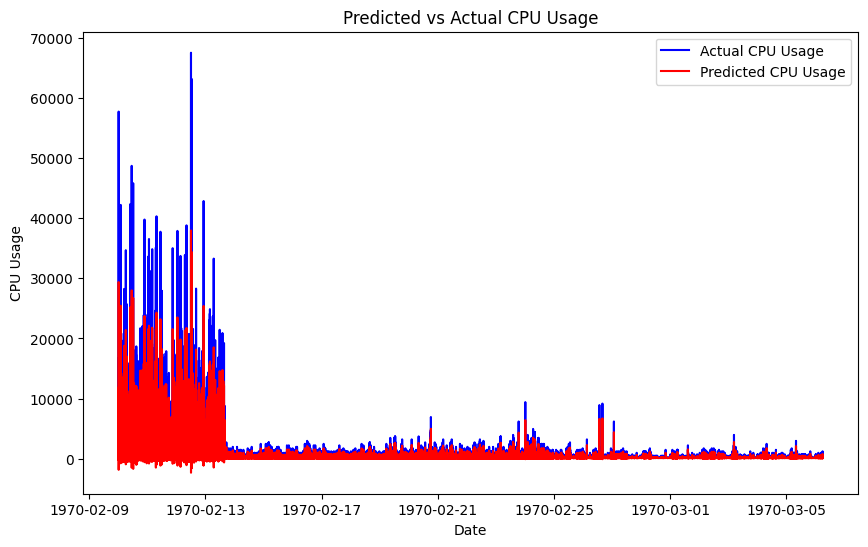

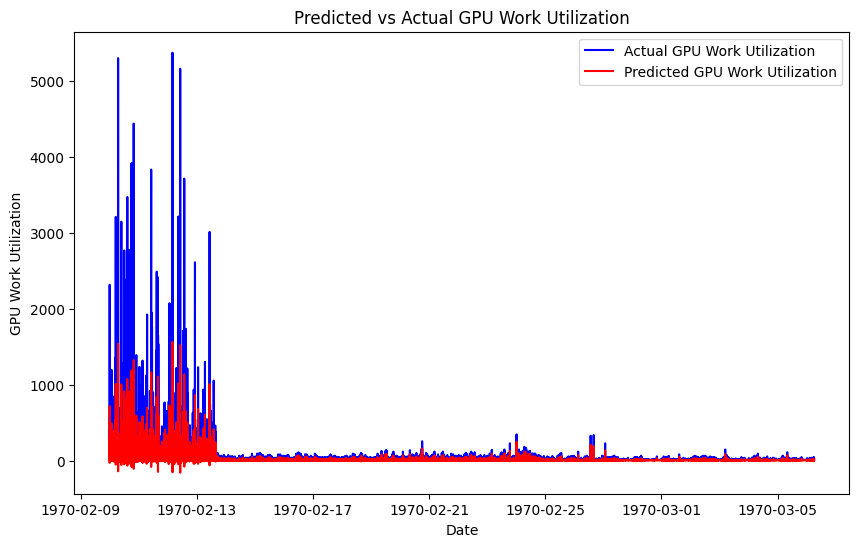

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Define model architecture - CPU
model_cpu = Sequential([
    Flatten(input_shape=(window_size, 1)),  # Flatten layer to convert input shape
    Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    Flatten(input_shape=(window_size, 1)),  # Flatten layer to convert input shape
    Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-03-08')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)

# Print error values - CPU
print("CPU Usage:")
print("Mean Squared Error (MSE):", mse_cpu)
print("Mean Absolute Error (MAE):", mae_cpu)
print("R-squared Score (R2):", r2_cpu)

# Print error values - GPU
print("\nGPU Work Utilization:")
print("Mean Squared Error (MSE):", mse_gpu)
print("Mean Absolute Error (MAE):", mae_gpu)
print("R-squared Score (R2):", r2_gpu)

# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()

week

1281/1281 [==============================] - 4s 3ms/step
CPU Usage:
Mean Squared Error (MSE): 6640724.160502145
Mean Absolute Error (MAE): 860.7226041649255
R-squared Score (R2): -0.38694671220444077

GPU Work Utilization:
Mean Squared Error (MSE): 12419.487696394393
Mean Absolute Error (MAE): 24.77544531091423
R-squared Score (R2): -0.19338694775442966


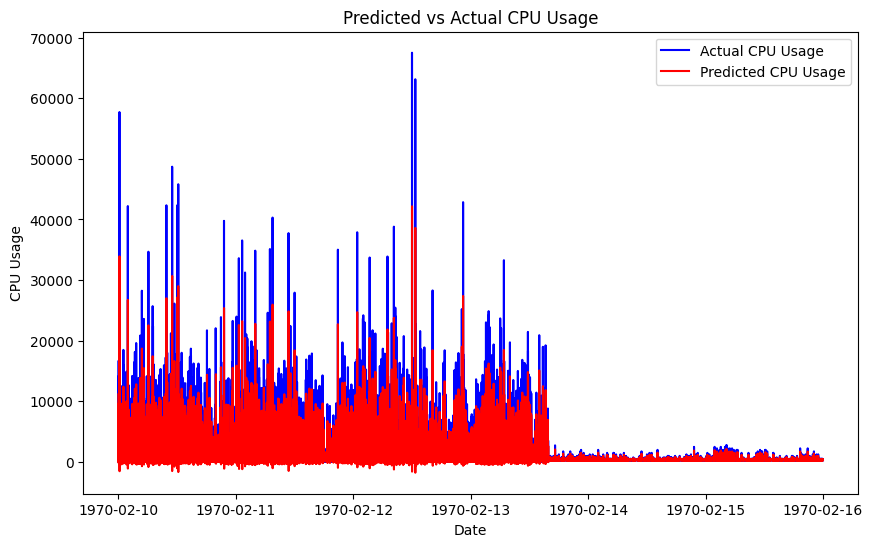

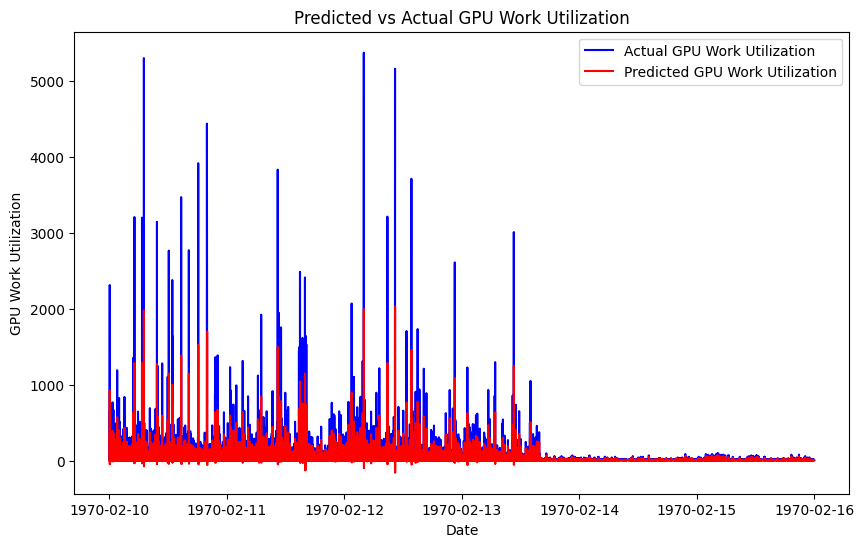

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Define model architecture - CPU
model_cpu = Sequential([
    Flatten(input_shape=(window_size, 1)),  # Flatten layer to convert input shape
    Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    Flatten(input_shape=(window_size, 1)),  # Flatten layer to convert input shape
    Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-16')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)

# Print error values - CPU
print("CPU Usage:")
print("Mean Squared Error (MSE):", mse_cpu)
print("Mean Absolute Error (MAE):", mae_cpu)
print("R-squared Score (R2):", r2_cpu)

# Print error values - GPU
print("\nGPU Work Utilization:")
print("Mean Squared Error (MSE):", mse_gpu)
print("Mean Absolute Error (MAE):", mae_gpu)
print("R-squared Score (R2):", r2_gpu)

# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()

day

306/306 [==============================] - 0s 1ms/step
CPU Usage:
Mean Squared Error (MSE): 9126157.064733898
Mean Absolute Error (MAE): 1196.2306247905326
R-squared Score (R2): -0.44650610422308734

GPU Work Utilization:
Mean Squared Error (MSE): 19308.747060210546
Mean Absolute Error (MAE): 29.728711740147983
R-squared Score (R2): -0.0998602246765421


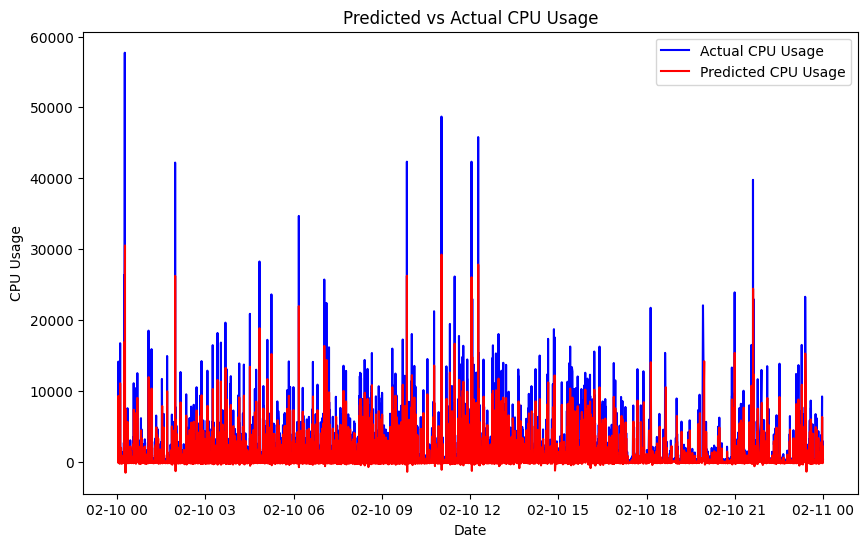

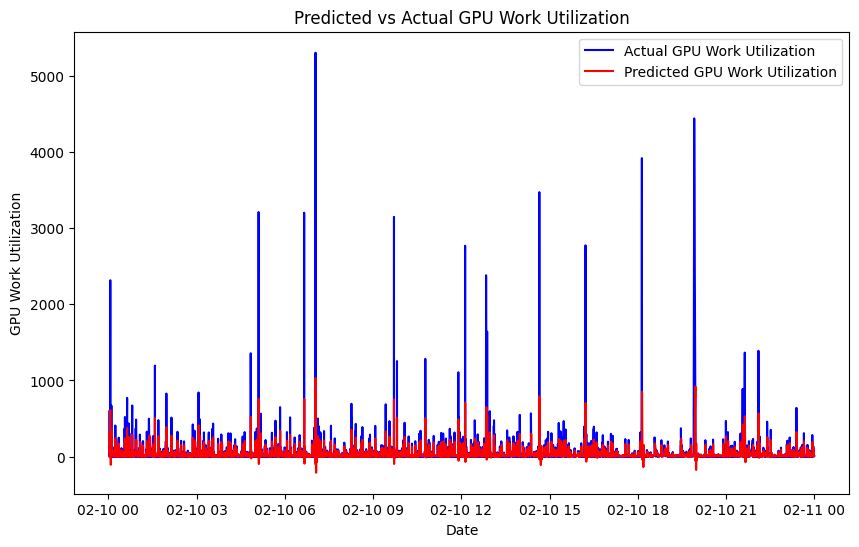

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
y_train_cpu = np.array(train_sequences_cpu)[:, -1, 0]  # Predict 'plan_cpu' for the last time step

X_train_gpu = np.array(train_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
y_train_gpu = np.array(train_sequences_gpu)[:, -1, 0]  # Predict 'plan_gpu' for the last time step

# Define model architecture - CPU
model_cpu = Sequential([
    Flatten(input_shape=(window_size, 1)),  # Flatten layer to convert input shape
    Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer
])

# Compile the model - CPU
model_cpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - CPU
early_stopping_cpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - CPU
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cpu])

# Define model architecture - GPU
model_gpu = Sequential([
    Flatten(input_shape=(window_size, 1)),  # Flatten layer to convert input shape
    Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer
])

# Compile the model - GPU
model_gpu.compile(optimizer='adam', loss='mse')

# Define early stopping callback - GPU
early_stopping_gpu = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping - GPU
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[early_stopping_gpu])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-11')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)[:, :, 1]  # Use only 'cpu_usage' as input for simplicity
X_predict_cpu = X_predict_cpu.reshape(X_predict_cpu.shape[0], X_predict_cpu.shape[1], 1)

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity
X_predict_gpu = X_predict_gpu.reshape(X_predict_gpu.shape[0], X_predict_gpu.shape[1], 1)

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)

# Print error values - CPU
print("CPU Usage:")
print("Mean Squared Error (MSE):", mse_cpu)
print("Mean Absolute Error (MAE):", mae_cpu)
print("R-squared Score (R2):", r2_cpu)

# Print error values - GPU
print("\nGPU Work Utilization:")
print("Mean Squared Error (MSE):", mse_gpu)
print("Mean Absolute Error (MAE):", mae_gpu)
print("R-squared Score (R2):", r2_gpu)

# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()

MULTI HEAD SELF ATTENTION MODEL

MONTH

Epoch 1/50
3624/3624 [==============================] - 50s 12ms/step - loss: 4.3749e-04 - val_loss: 7.6151e-04
Epoch 2/50
3624/3624 [==============================] - 26s 7ms/step - loss: 4.3192e-04 - val_loss: 7.6321e-04
Epoch 3/50
3624/3624 [==============================] - 24s 7ms/step - loss: 4.2846e-04 - val_loss: 7.4478e-04
Epoch 4/50
3624/3624 [==============================] - 25s 7ms/step - loss: 3.8203e-04 - val_loss: 6.5723e-04
Epoch 5/50
3624/3624 [==============================] - 26s 7ms/step - loss: 3.1826e-04 - val_loss: 5.8130e-04
Epoch 6/50
3624/3624 [==============================] - 22s 6ms/step - loss: 2.9362e-04 - val_loss: 5.6336e-04
Epoch 7/50
3624/3624 [==============================] - 24s 7ms/step - loss: 2.8574e-04 - val_loss: 5.7225e-04
Epoch 8/50
3624/3624 [==============================] - 24s 6ms/step - loss: 2.8551e-04 - val_loss: 5.6101e-04
Epoch 9/50
3624/3624 [==============================] - 25s 7ms/step - loss: 2.8168e-04 - val_loss: 5.8446e-04


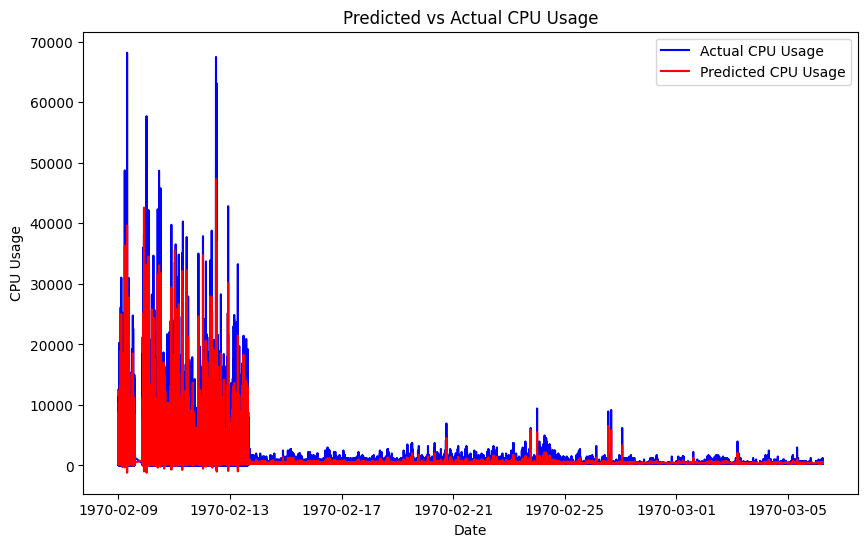

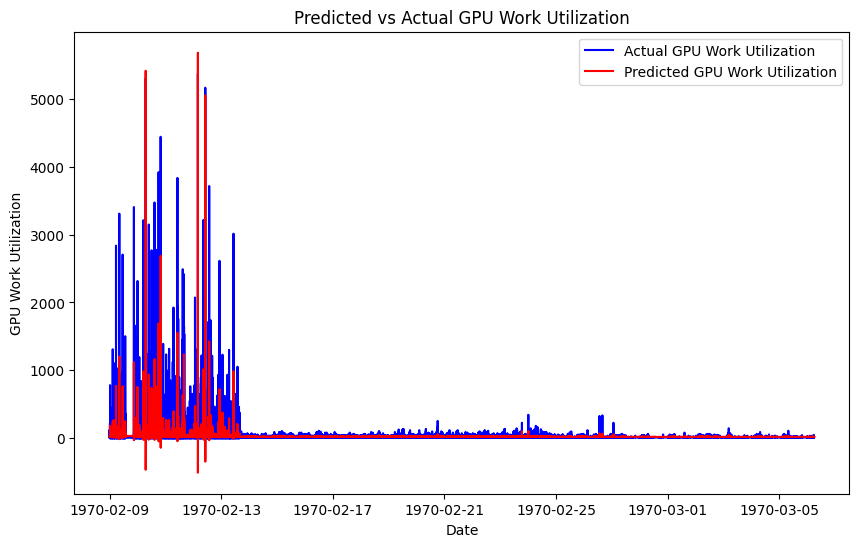

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, MultiHeadAttention
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)
y_train_cpu = X_train_cpu[:, -1, 0]  # Predict 'plan_cpu' for the last time step
X_train_cpu = X_train_cpu[:, :, 1]  # Use only 'cpu_usage' as input for simplicity

X_train_gpu = np.array(train_sequences_gpu)
y_train_gpu = X_train_gpu[:, -1, 0]  # Predict 'plan_gpu' for the last time step
X_train_gpu = X_train_gpu[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity

# Define input layers
input_cpu = Input(shape=(window_size, 1))
input_gpu = Input(shape=(window_size, 1))

# Multi-head self-attention layer for CPU
attention_cpu = MultiHeadAttention(num_heads=4, key_dim=16)(input_cpu, input_cpu)

# Multi-head self-attention layer for GPU
attention_gpu = MultiHeadAttention(num_heads=4, key_dim=16)(input_gpu, input_gpu)

# Flatten the outputs
flatten_cpu = Flatten()(attention_cpu)
flatten_gpu = Flatten()(attention_gpu)

# Dense layers for CPU
dense_cpu = Dense(64, activation='relu')(flatten_cpu)
dropout_cpu = Dropout(0.2)(dense_cpu)

# Dense layers for GPU
dense_gpu = Dense(64, activation='relu')(flatten_gpu)
dropout_gpu = Dropout(0.2)(dense_gpu)

# Output layers
output_cpu = Dense(1)(dropout_cpu)
output_gpu = Dense(1)(dropout_gpu)

# Define models
model_cpu = Model(inputs=input_cpu, outputs=output_cpu)
model_gpu = Model(inputs=input_gpu, outputs=output_gpu)

# Compile models
model_cpu.compile(optimizer='adam', loss='mse')
model_gpu.compile(optimizer='adam', loss='mse')

# Train the models
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-09') & (features['start_date'] <= '1970-03-08')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)
X_predict_cpu = X_predict_cpu[:, :, 1]  # Use only 'cpu_usage' as input for simplicity

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)
X_predict_gpu = X_predict_gpu[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)

# Print error values - CPU
print("CPU Usage:")
print("Mean Squared Error (MSE):", mse_cpu)
print("Mean Absolute Error (MAE):", mae_cpu)
print("R-squared Score (R2):", r2_cpu)

# Print error values - GPU
print("\nGPU Work Utilization:")
print("Mean Squared Error (MSE):", mse_gpu)
print("Mean Absolute Error (MAE):", mae_gpu)
print("R-squared Score (R2):", r2_gpu)

# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


WEEK

1281/1281 [==============================] - 5s 4ms/step
CPU Usage:
Mean Squared Error (MSE): 5198592.506128619
Mean Absolute Error (MAE): 800.9305307498507
R-squared Score (R2): -0.08575068173295852

GPU Work Utilization:
Mean Squared Error (MSE): 10510.566168091076
Mean Absolute Error (MAE): 31.025973859195577
R-squared Score (R2): -0.009958927867104839


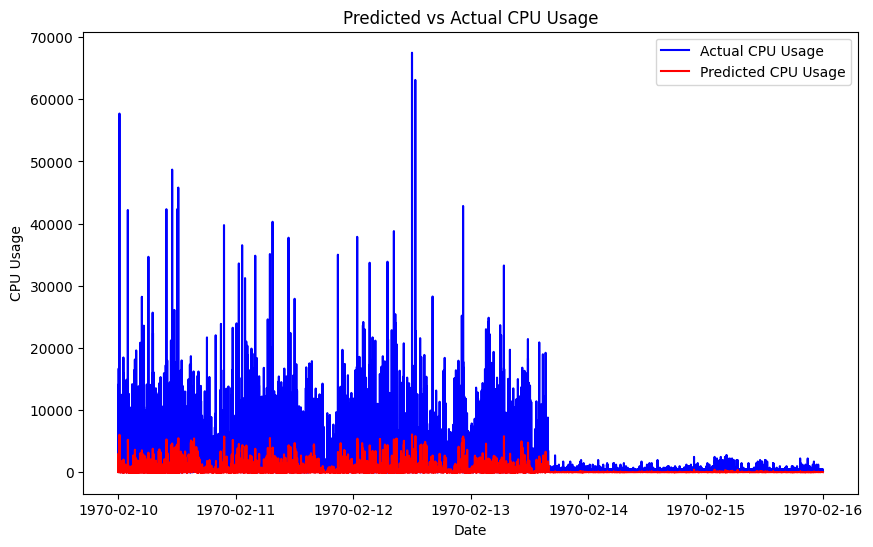

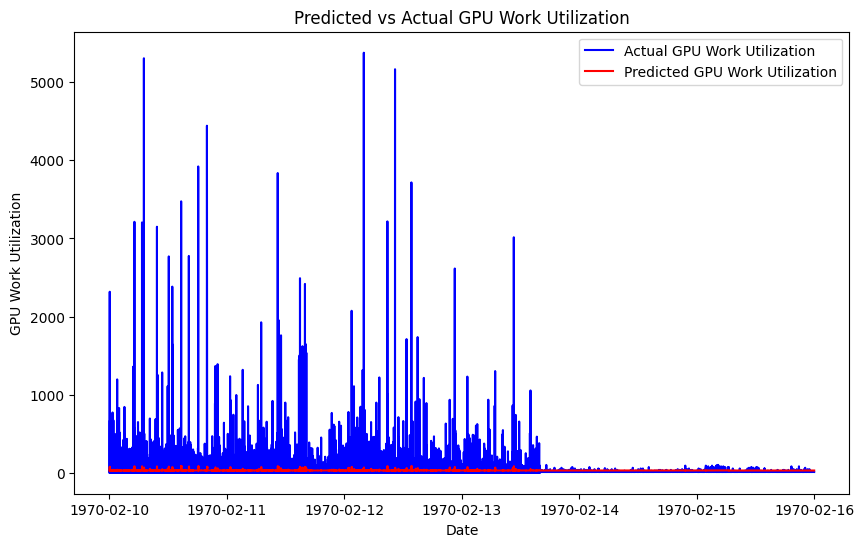

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, MultiHeadAttention
from tensorflow.keras.callbacks import EarlyStopping

# Read the CSV file
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime with error handling
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Drop rows with NaT values in 'start_date' column
df.dropna(subset=['start_date'], inplace=True)

# Extract relevant features
features = df[['start_date', 'plan_cpu', 'cpu_usage', 'plan_gpu', 'gpu_wrk_util', 'task_count']]

# Filter data for training (from 08-01-1970 to 08-02-1970)
train_data_cpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]
train_data_gpu = features[(features['start_date'] >= '1970-01-08') & (features['start_date'] <= '1970-02-08')]

# Normalize the training data
scaler_cpu = MinMaxScaler()
scaler_gpu = MinMaxScaler()

scaled_train_data_cpu = scaler_cpu.fit_transform(train_data_cpu[['plan_cpu', 'cpu_usage']])
scaled_train_data_gpu = scaler_gpu.fit_transform(train_data_gpu[['plan_gpu', 'gpu_wrk_util']])

# Define window size (number of time steps to look back)
window_size = 10  # You can adjust this as needed

# Create sequences for training data - CPU
train_sequences_cpu = []
for i in range(len(scaled_train_data_cpu) - window_size):
    sequence = scaled_train_data_cpu[i:i+window_size]
    train_sequences_cpu.append(sequence)

# Create sequences for training data - GPU
train_sequences_gpu = []
for i in range(len(scaled_train_data_gpu) - window_size):
    sequence = scaled_train_data_gpu[i:i+window_size]
    train_sequences_gpu.append(sequence)

# Convert training sequences to numpy array
X_train_cpu = np.array(train_sequences_cpu)
y_train_cpu = X_train_cpu[:, -1, 0]  # Predict 'plan_cpu' for the last time step
X_train_cpu = X_train_cpu[:, :, 1]  # Use only 'cpu_usage' as input for simplicity

X_train_gpu = np.array(train_sequences_gpu)
y_train_gpu = X_train_gpu[:, -1, 0]  # Predict 'plan_gpu' for the last time step
X_train_gpu = X_train_gpu[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity

# Define input layers
input_cpu = Input(shape=(window_size, 1))
input_gpu = Input(shape=(window_size, 1))

# Multi-head self-attention layer for CPU
attention_cpu = MultiHeadAttention(num_heads=4, key_dim=16)(input_cpu, input_cpu)

# Multi-head self-attention layer for GPU
attention_gpu = MultiHeadAttention(num_heads=4, key_dim=16)(input_gpu, input_gpu)

# Flatten the outputs
flatten_cpu = Flatten()(attention_cpu)
flatten_gpu = Flatten()(attention_gpu)

# Dense layers for CPU
dense_cpu = Dense(64, activation='relu')(flatten_cpu)
dropout_cpu = Dropout(0.2)(dense_cpu)

# Dense layers for GPU
dense_gpu = Dense(64, activation='relu')(flatten_gpu)
dropout_gpu = Dropout(0.2)(dense_gpu)

# Output layers
output_cpu = Dense(1)(dropout_cpu)
output_gpu = Dense(1)(dropout_gpu)

# Define models
model_cpu = Model(inputs=input_cpu, outputs=output_cpu)
model_gpu = Model(inputs=input_gpu, outputs=output_gpu)

# Compile models
model_cpu.compile(optimizer='adam', loss='mse')
model_gpu.compile(optimizer='adam', loss='mse')

# Train the models
history_cpu = model_cpu.fit(X_train_cpu, y_train_cpu, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])
history_gpu = model_gpu.fit(X_train_gpu, y_train_gpu, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Filter data for prediction (from 09-02-1970 to 15-02-1970)
predict_data = features[(features['start_date'] >= '1970-02-10') & (features['start_date'] <= '1970-02-16')]

# Normalize the prediction data
scaled_predict_data_cpu = scaler_cpu.transform(predict_data[['plan_cpu', 'cpu_usage']])
scaled_predict_data_gpu = scaler_gpu.transform(predict_data[['plan_gpu', 'gpu_wrk_util']])

# Create sequences for prediction data - CPU
predict_sequences_cpu = []
for i in range(len(scaled_predict_data_cpu) - window_size):
    sequence = scaled_predict_data_cpu[i:i+window_size]
    predict_sequences_cpu.append(sequence)

# Create sequences for prediction data - GPU
predict_sequences_gpu = []
for i in range(len(scaled_predict_data_gpu) - window_size):
    sequence = scaled_predict_data_gpu[i:i+window_size]
    predict_sequences_gpu.append(sequence)

# Convert prediction sequences to numpy array - CPU
X_predict_cpu = np.array(predict_sequences_cpu)
X_predict_cpu = X_predict_cpu[:, :, 1]  # Use only 'cpu_usage' as input for simplicity

# Convert prediction sequences to numpy array - GPU
X_predict_gpu = np.array(predict_sequences_gpu)
X_predict_gpu = X_predict_gpu[:, :, 1]  # Use only 'gpu_wrk_util' as input for simplicity

# Make predictions - CPU
predictions_cpu = model_cpu.predict(X_predict_cpu)

# Make predictions - GPU
predictions_gpu = model_gpu.predict(X_predict_gpu)

# Inverse transform the predictions for plotting - CPU
predictions_unscaled_cpu = scaler_cpu.inverse_transform(np.concatenate((np.zeros((len(predictions_cpu), 1)), predictions_cpu), axis=1))[:, 1]
actual_unscaled_cpu = predict_data['cpu_usage'].values[window_size:]

# Inverse transform the predictions for plotting - GPU
predictions_unscaled_gpu = scaler_gpu.inverse_transform(np.concatenate((np.zeros((len(predictions_gpu), 1)), predictions_gpu), axis=1))[:, 1]
actual_unscaled_gpu = predict_data['gpu_wrk_util'].values[window_size:]

# Calculate error values - CPU
mse_cpu = mean_squared_error(actual_unscaled_cpu, predictions_unscaled_cpu)
mae_cpu = mean_absolute_error(actual_unscaled_cpu, predictions_unscaled_cpu)
r2_cpu = r2_score(actual_unscaled_cpu, predictions_unscaled_cpu)

# Calculate error values - GPU
mse_gpu = mean_squared_error(actual_unscaled_gpu, predictions_unscaled_gpu)
mae_gpu = mean_absolute_error(actual_unscaled_gpu, predictions_unscaled_gpu)
r2_gpu = r2_score(actual_unscaled_gpu, predictions_unscaled_gpu)

# Print error values - CPU
print("CPU Usage:")
print("Mean Squared Error (MSE):", mse_cpu)
print("Mean Absolute Error (MAE):", mae_cpu)
print("R-squared Score (R2):", r2_cpu)

# Print error values - GPU
print("\nGPU Work Utilization:")
print("Mean Squared Error (MSE):", mse_gpu)
print("Mean Absolute Error (MAE):", mae_gpu)
print("R-squared Score (R2):", r2_gpu)

# Plot the output graph - CPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_cpu, label='Actual CPU Usage', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_cpu, label='Predicted CPU Usage', color='red')
plt.xlabel('Date')
plt.ylabel('CPU Usage')
plt.title('Predicted vs Actual CPU Usage')
plt.legend()
plt.show()

# Plot the output graph - GPU
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], predictions_unscaled_gpu, label='Predicted GPU Work Utilization', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


TRANSFORMER MODEL

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade tensorflow-addons


Ensemble Mean Squared Error (MSE): 11558.118390364072
Ensemble Mean Absolute Error (MAE): 24.157794491803877
Ensemble R^2 Score: -0.11061808384136285


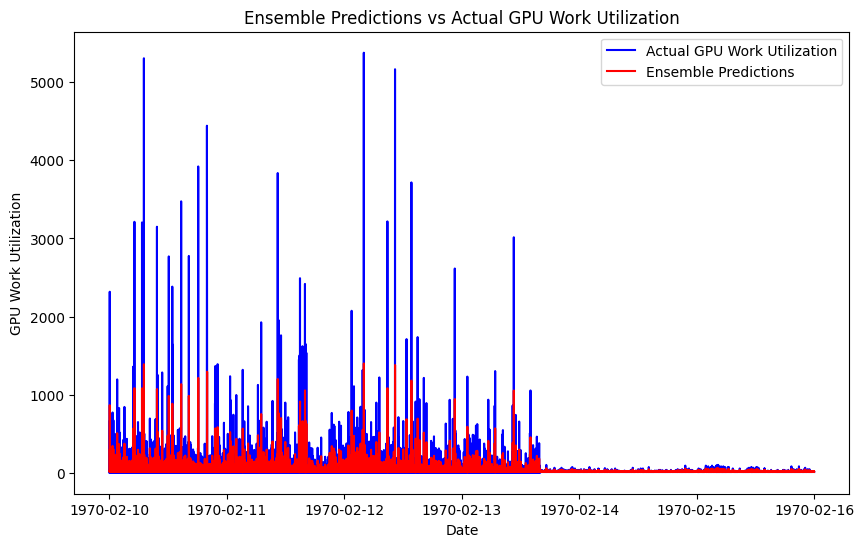

In [ ]:
# Ensemble the predictions
ensemble_predictions = predictions_unscaled_gpu

# Calculate error values for ensemble predictions
mse_ensemble = mean_squared_error(actual_unscaled_gpu, ensemble_predictions)
mae_ensemble = mean_absolute_error(actual_unscaled_gpu, ensemble_predictions)
r2_ensemble = r2_score(actual_unscaled_gpu, ensemble_predictions)

# Print error values for ensemble predictions
print("Ensemble Mean Squared Error (MSE):", mse_ensemble)
print("Ensemble Mean Absolute Error (MAE):", mae_ensemble)
print("Ensemble R^2 Score:", r2_ensemble)

# Plot the output graph for ensemble predictions
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:], actual_unscaled_gpu, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:], ensemble_predictions, label='Ensemble Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Ensemble Predictions vs Actual GPU Work Utilization')
plt.legend()
plt.show()


Epoch 1/50
820/820 [==============================] - 11s 9ms/step - loss: 12015.6436 - val_loss: 5400.5000
Epoch 2/50
820/820 [==============================] - 7s 9ms/step - loss: 11526.1484 - val_loss: 5073.9297
Epoch 3/50
820/820 [==============================] - 6s 8ms/step - loss: 11230.6807 - val_loss: 4881.5806
Epoch 4/50
820/820 [==============================] - 8s 9ms/step - loss: 11052.1904 - val_loss: 4783.7559
Epoch 5/50
820/820 [==============================] - 8s 9ms/step - loss: 10923.0576 - val_loss: 4684.3418
Epoch 6/50
820/820 [==============================] - 8s 10ms/step - loss: 10829.6514 - val_loss: 4616.0435
Epoch 7/50
820/820 [==============================] - 6s 8ms/step - loss: 10762.0664 - val_loss: 4552.6348
Epoch 8/50
820/820 [==============================] - 8s 10ms/step - loss: 10691.8203 - val_loss: 4508.8086
Epoch 9/50
820/820 [==============================] - 7s 8ms/step - loss: 10628.0254 - val_loss: 4572.6514
Epoch 10/50
820/820 [=============

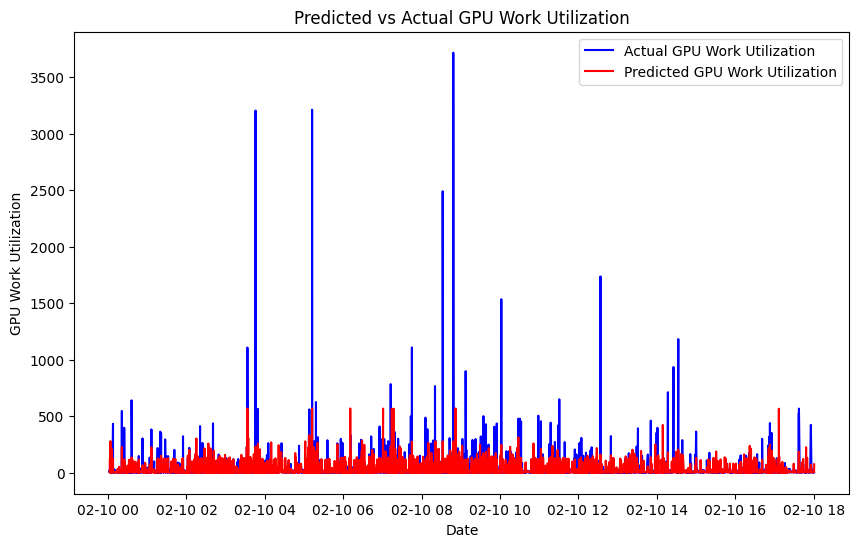

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
import tensorflow.keras.backend as K


# Reshape ensemble predictions to match the dimensionality
ensemble_predictions = ensemble_predictions.reshape(-1, 1)

# Ensure the lengths of both arrays match
min_length = min(len(ensemble_predictions), len(predict_data[['plan_gpu', 'gpu_wrk_util']].values))

# Concatenate ensemble predictions with other GPU features
combined_features_gpu = np.concatenate((ensemble_predictions[:min_length], predict_data[['plan_gpu', 'gpu_wrk_util']].values[:min_length]), axis=1)




# Split the data into features and target
X = combined_features_gpu[:, :-1]
y = combined_features_gpu[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the transformer model architecture
def transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(128, activation='relu')(inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = LayerNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    x = LayerNormalization()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Initialize and compile the transformer model
model_transformer = transformer_model(input_shape=X_train_scaled.shape[1:])
model_transformer.compile(optimizer=Adam(), loss='mse')

# Train the transformer model
history_transformer = model_transformer.fit(X_train_scaled, y_train, batch_size=32, epochs=50, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model_transformer.predict(X_test_scaled)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

# Plot the output graph for GPU work utilization
plt.figure(figsize=(10, 6))
plt.plot(predict_data['start_date'].values[window_size:][:len(y_test)], y_test, label='Actual GPU Work Utilization', color='blue')
plt.plot(predict_data['start_date'].values[window_size:][:len(y_test)], y_pred, label='Predicted GPU Work Utilization', color='red')

plt.xlabel('Date')
plt.ylabel('GPU Work Utilization')
plt.title('Predicted vs Actual GPU Work Utilization')
plt.legend()
plt.show()


ERROR MATRIX

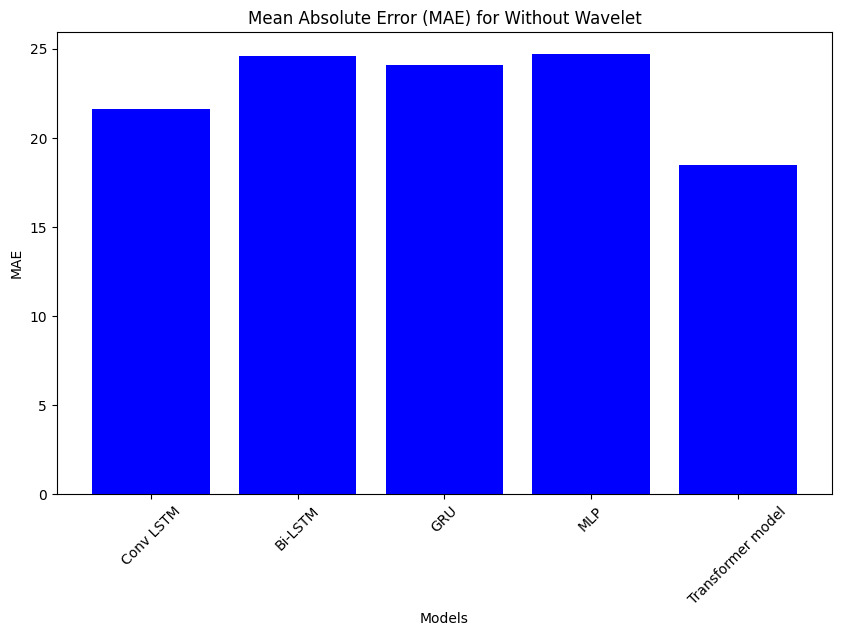

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Conv LSTM', 'Bi-LSTM', 'GRU', 'MLP','Transformer model']

# MAE values
mae_values = [21.6, 24.6, 24.1,24.7,18.5]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='blue')
plt.title('Mean Absolute Error (MAE) for Without Wavelet')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


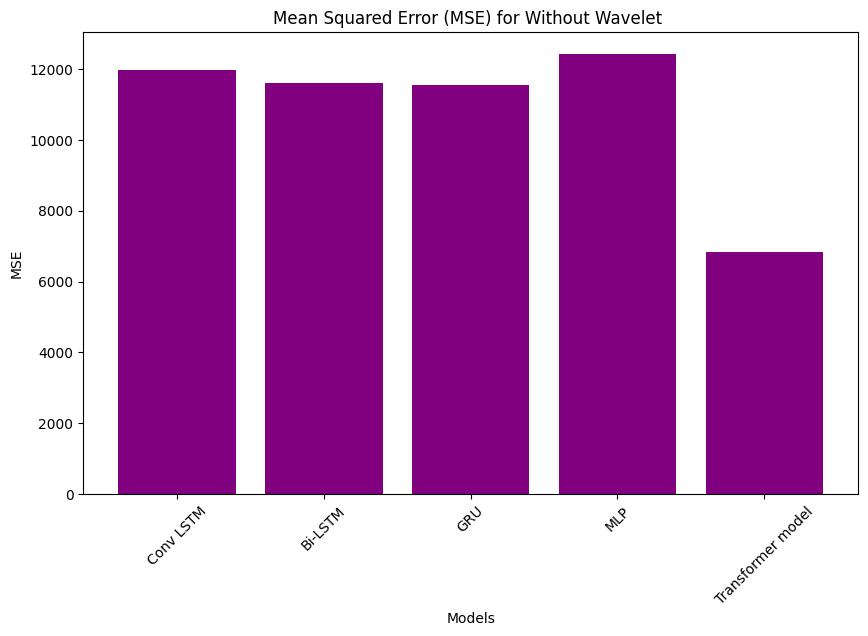

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Conv LSTM', 'Bi-LSTM', 'GRU', 'MLP','Transformer model']

# MSE values
mse_values = [11961.3, 11597.6, 11558.1, 12419.8,6840.4]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='purple')
plt.title('Mean Squared Error (MSE) for Without Wavelet ')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


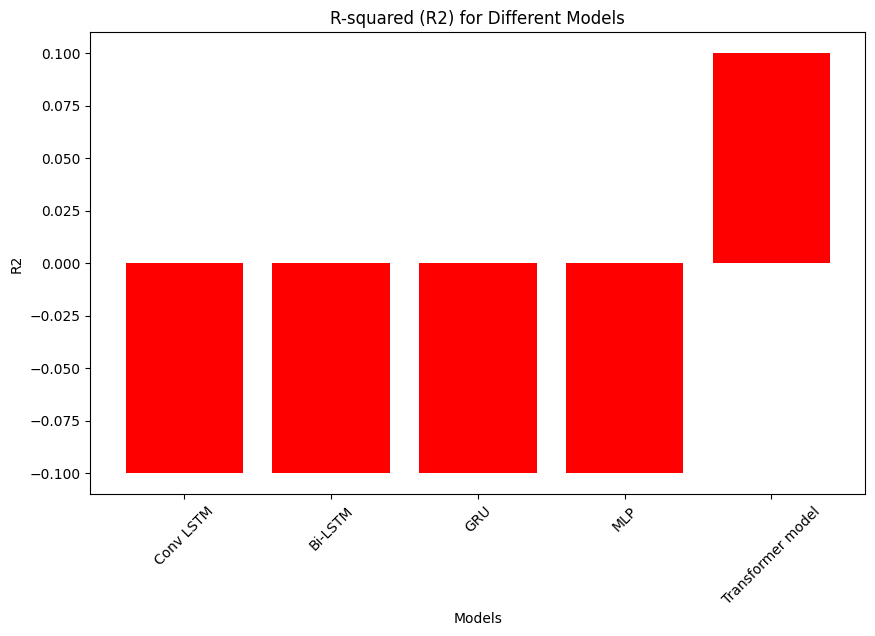

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Conv LSTM', 'Bi-LSTM', 'GRU',  'MLP','Transformer model']

# R2 values
r2_values = [-0.1, -0.1, -0.1, -0.1,0.1]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='red')
plt.title('R-squared (R2) for Different Models')
plt.xlabel('Models')
plt.ylabel('R2')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


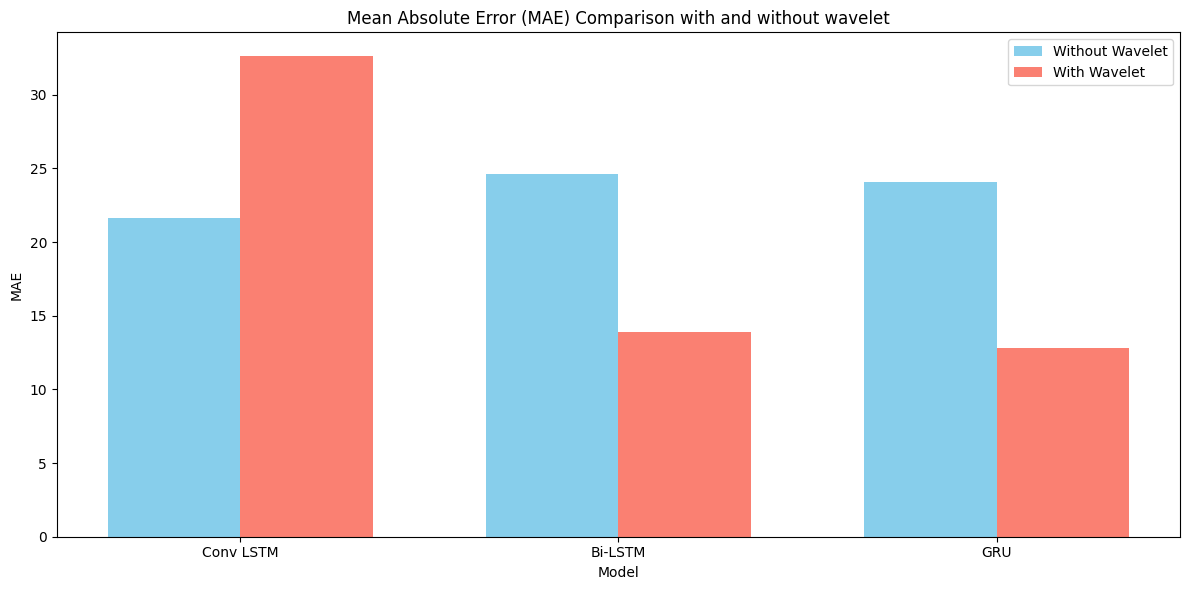

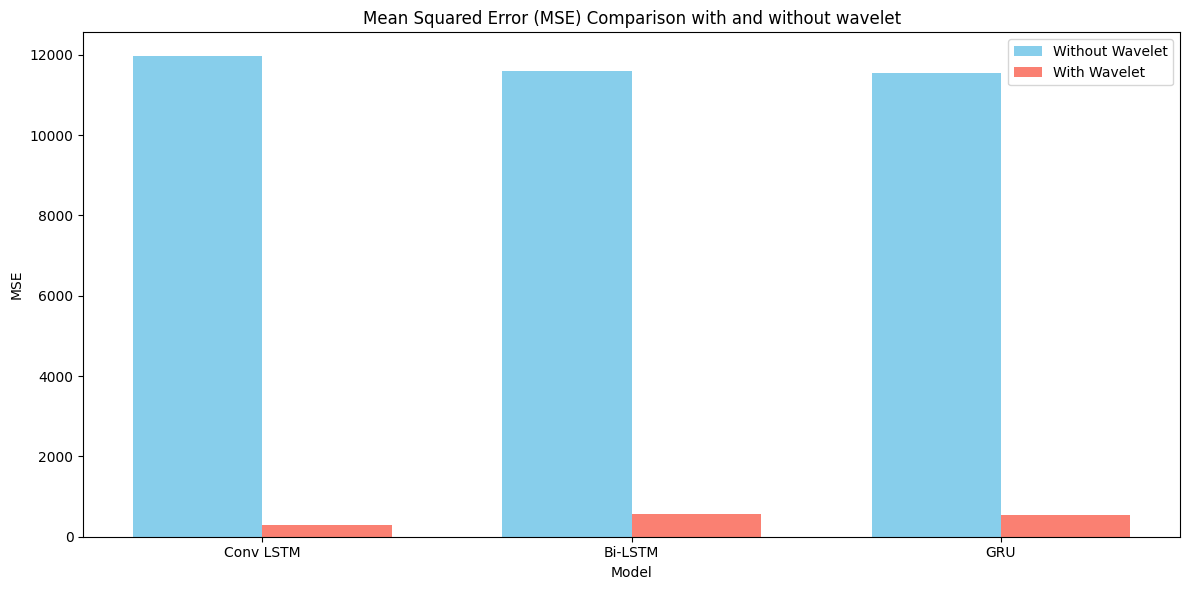

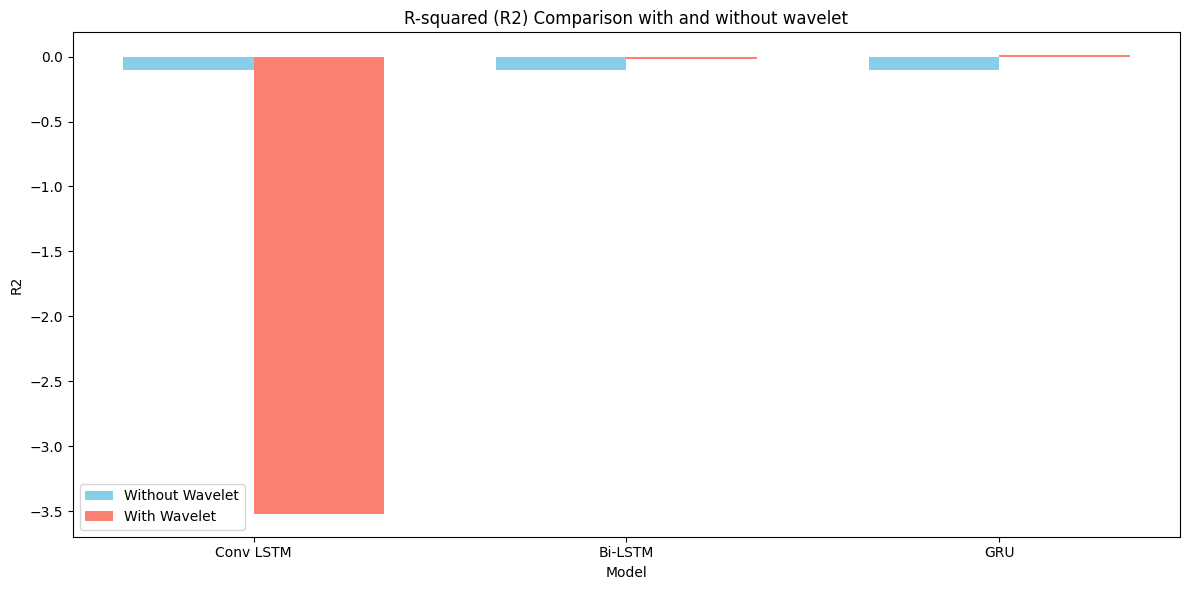

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for MAE without and with wavelet
mae_data = {
    'Model': ['Conv LSTM', 'Bi-LSTM', 'GRU'],
    'MAE Without Wavelet': [21.6, 24.6, 24.1],
    'MAE With Wavelet': [32.6, 13.9, 12.8]
}

# Data for MSE without and with wavelet
mse_data = {
    'Model': ['Conv LSTM', 'Bi-LSTM', 'GRU'],
    'MSE Without Wavelet': [11961.3, 11597.6, 11558.1],
    'MSE With Wavelet': [298.05, 569.1, 543.6]
}

# Data for R2 without and with wavelet
r2_data = {
    'Model': ['Conv LSTM', 'Bi-LSTM', 'GRU'],
    'R2 Without Wavelet': [-0.1, -0.1, -0.1],
    'R2 With Wavelet': [-3.52, -0.02, 0.01]
}

df_mae = pd.DataFrame(mae_data)
df_mse = pd.DataFrame(mse_data)
df_r2 = pd.DataFrame(r2_data)

# Plot MAE
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(df_mae['Model']))

plt.bar(index, df_mae['MAE Without Wavelet'], bar_width, label='Without Wavelet', color='skyblue')
plt.bar(index + bar_width, df_mae['MAE With Wavelet'], bar_width, label='With Wavelet', color='salmon')

plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) Comparison with and without wavelet')
plt.xticks(index + bar_width / 2, df_mae['Model'])
plt.legend()
plt.tight_layout()
plt.show()

# Plot MSE
plt.figure(figsize=(12, 6))

plt.bar(index, df_mse['MSE Without Wavelet'], bar_width, label='Without Wavelet', color='skyblue')
plt.bar(index + bar_width, df_mse['MSE With Wavelet'], bar_width, label='With Wavelet', color='salmon')

plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison with and without wavelet')
plt.xticks(index + bar_width / 2, df_mse['Model'])
plt.legend()
plt.tight_layout()
plt.show()

# Plot R2
plt.figure(figsize=(12, 6))

plt.bar(index, df_r2['R2 Without Wavelet'], bar_width, label='Without Wavelet', color='skyblue')
plt.bar(index + bar_width, df_r2['R2 With Wavelet'], bar_width, label='With Wavelet', color='salmon')

plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R-squared (R2) Comparison with and without wavelet')
plt.xticks(index + bar_width / 2, df_r2['Model'])
plt.legend()
plt.tight_layout()
plt.show()


TimeGPT

In [ ]:
!pip install nixtlats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 980.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.1
    Uninstalling pydantic-2.6.1:
      Successfully uninstalled pydantic-2.6.1


In [ ]:

from nixtlats import TimeGPT


In [ ]:
timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = 'dTFO3z2C3ZNpkbxh8GpwAdmozg9iQO7q6qfingC2mMAoK7zgKQJcJJC6e5cMsU3fAzUKKrM3uydza46AFjlmTSCmwySSUZsYdO1TVMTDFUWVB4r1wQxzy1aHzfQhr53VesISAPJf0asOkcidNgOhXuvxzbmq9uL9wd6R0tbepFah8klcUSukqNlBlEkRgBYW0haAXSBjjEZbAmeuLyAdNRVgzYtV1OrIpJlOYjfbGYOYGbunDCGRY0luBFEDFrH7'
)

In [ ]:
timegpt.validate_token()


True

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final1.csv')
df.head()


start_date  plan_cpu   cpu_usage   plan_gpu  gpu_wrk_util  \
0  1970-01-10 00:21:14     600.0  247.849507   61.83666      9.074449   
1  1970-01-10 00:31:58     600.0  247.849507   61.83666      9.074449   
2  1970-01-10 00:43:29     600.0  247.849507   61.83666      9.074449   
3  1970-01-10 01:58:23     600.0  247.849507   61.83666      9.074449   
4  1970-01-10 08:51:23     600.0  247.849507  100.00000      9.074449   

   task_count  
0           1  
1           1  
2           1  
3           1  
4           1

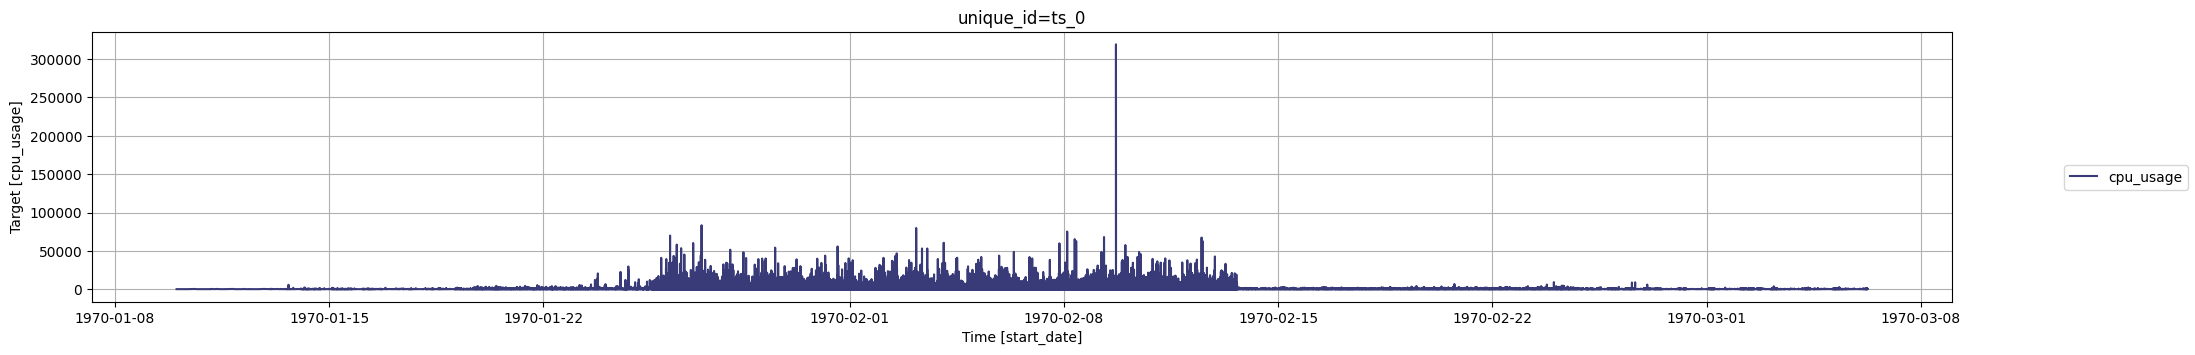

In [ ]:
timegpt.plot(df, time_col='start_date', target_col='cpu_usage')

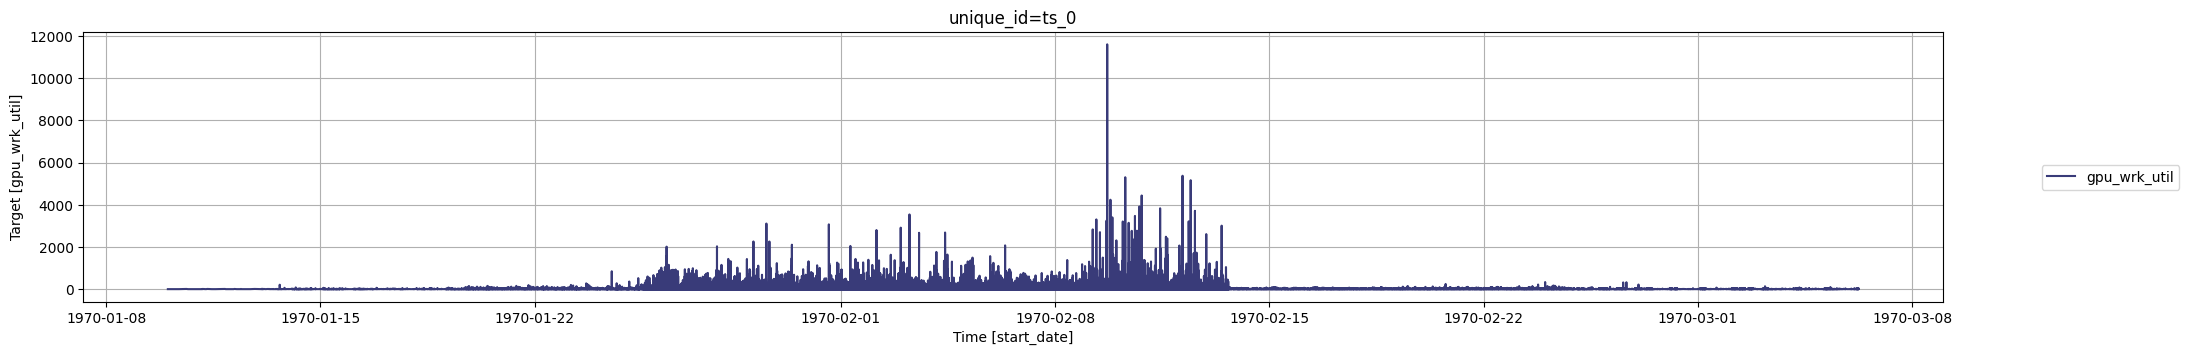

In [ ]:
timegpt.plot(df, time_col='start_date', target_col='gpu_wrk_util')

In [ ]:
df.reset_index(drop=True, inplace=True)  # Reset index without keeping the old index

In [ ]:
df = df.drop_duplicates(subset=['start_date'])  # Drop duplicate rows based on 'start_date'

In [ ]:
print(df[df.duplicated(subset=['start_date'], keep=False)])


Empty DataFrame
Columns: [start_date, plan_cpu, cpu_usage, plan_gpu, gpu_wrk_util, task_count]
Index: []


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/final1.csv'
df = pd.read_csv(file_path)

# Convert 'start_date' column to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Ensure unique index
df.drop_duplicates(subset=['start_date'], inplace=True)  # Drop duplicate rows based on 'start_date'
df.set_index('start_date', inplace=True)  # Set 'start_date' column as the index

# Save to CSV with unique index
unique_index_file_path = '/content/drive/MyDrive/dataset/final1_unique_index.csv'
df.to_csv(unique_index_file_path)

# Print a sample of the DataFrame
print("DataFrame with Unique Index:")
print(df.head())

# Verify if the index is unique
print("Is the Index Unique?", df.index.is_unique)


DataFrame with Unique Index:
                     plan_cpu   cpu_usage   plan_gpu  gpu_wrk_util  task_count
start_date                                                                    
1970-01-10 00:21:14     600.0  247.849507   61.83666      9.074449           1
1970-01-10 00:31:58     600.0  247.849507   61.83666      9.074449           1
1970-01-10 00:43:29     600.0  247.849507   61.83666      9.074449           1
1970-01-10 01:58:23     600.0  247.849507   61.83666      9.074449           1
1970-01-10 08:51:23     600.0  247.849507  100.00000      9.074449           1
Is the Index Unique? True


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final1_unique_index.csv')
df.head()

start_date  plan_cpu   cpu_usage   plan_gpu  gpu_wrk_util  \
0  1970-01-10 00:21:14     600.0  247.849507   61.83666      9.074449   
1  1970-01-10 00:31:58     600.0  247.849507   61.83666      9.074449   
2  1970-01-10 00:43:29     600.0  247.849507   61.83666      9.074449   
3  1970-01-10 01:58:23     600.0  247.849507   61.83666      9.074449   
4  1970-01-10 08:51:23     600.0  247.849507  100.00000      9.074449   

   task_count  
0           1  
1           1  
2           1  
3           1  
4           1

CPU USAGE FORECAST FOR NEXT 2 YEARS

In [ ]:
f_df = timegpt.forecast(df=df, h=24, freq='MS', time_col='start_date', target_col='cpu_usage')
f_df.head()

start_date     TimeGPT
0  1970-04-01  266.549225
1  1970-05-01  255.470261
2  1970-06-01  262.319824
3  1970-07-01  270.507141
4  1970-08-01  270.848511

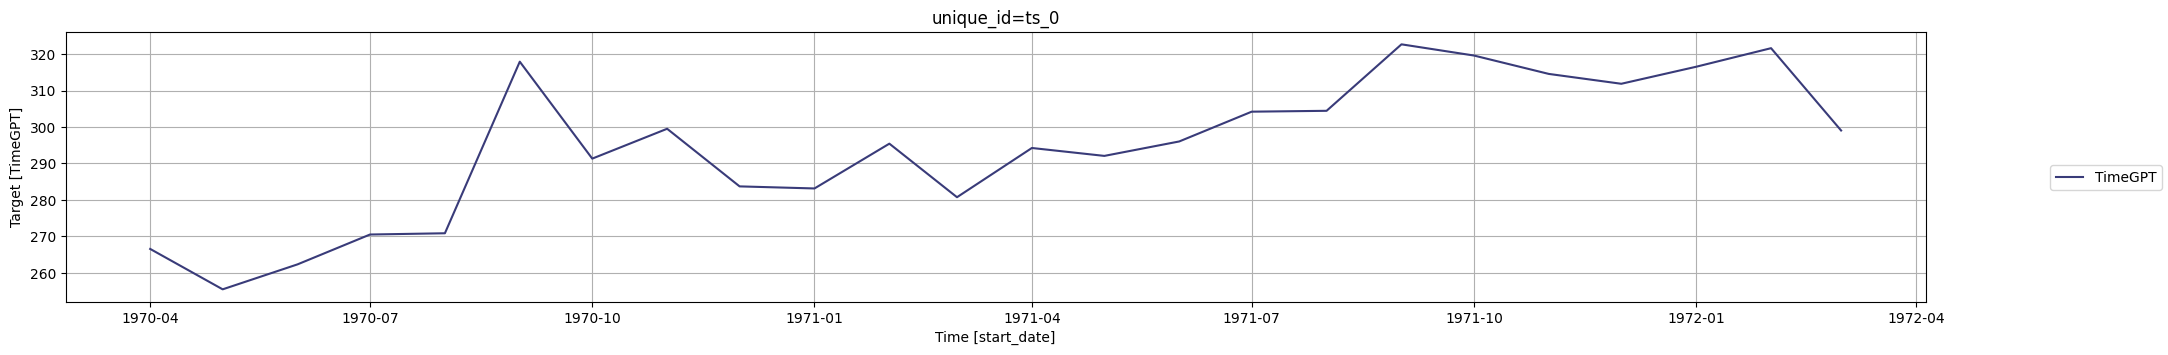

In [ ]:
timegpt.plot(f_df,time_col='start_date', target_col='TimeGPT')

GPU USAGE FORECAST FOR NEXT 2 YEARS

```
# This is formatted as code
```



In [ ]:
fc_df = timegpt.forecast(df=df, h=24, freq='MS', time_col='start_date', target_col='gpu_wrk_util')
fc_df.head()

start_date   TimeGPT
0  1970-04-01  8.819507
1  1970-05-01  9.053301
2  1970-06-01  9.341403
3  1970-07-01  9.244068
4  1970-08-01  8.960285

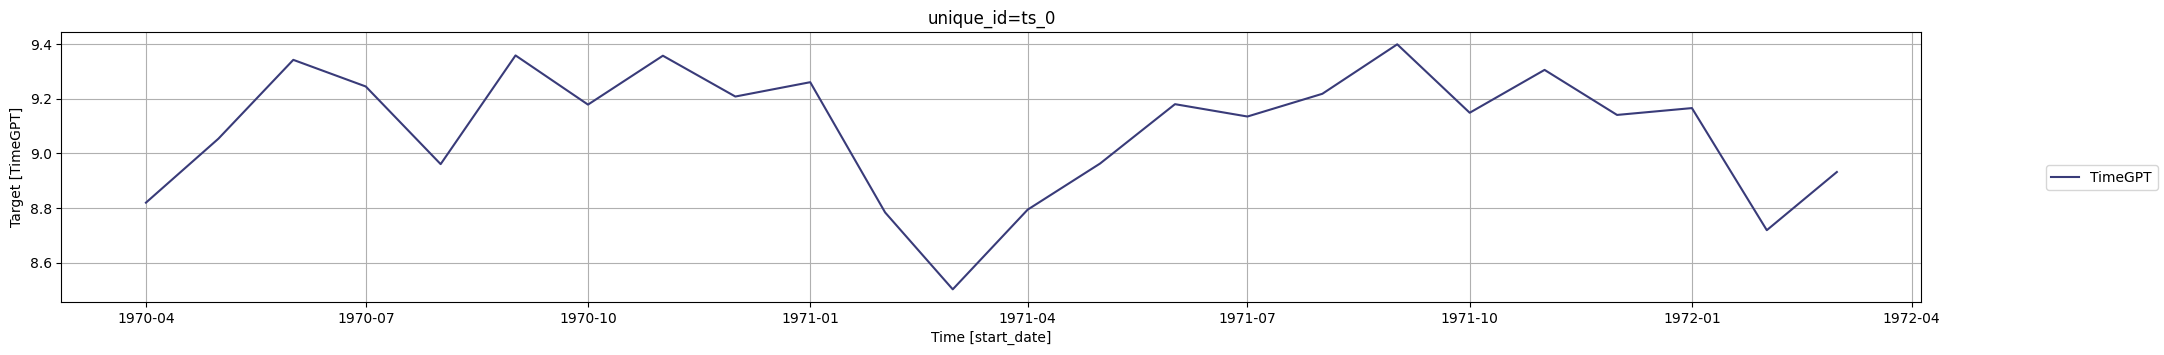

In [ ]:
timegpt.plot(fc_df,time_col='start_date', target_col='TimeGPT')

CPU USAGE FORECASR FOR NEXT 1 YEAR

In [ ]:
fs_df = timegpt.forecast(df=df, h=12, freq='MS', time_col='start_date', target_col='cpu_usage')
fs_df.head()

start_date     TimeGPT
0  1970-04-01  266.549225
1  1970-05-01  255.470261
2  1970-06-01  262.319824
3  1970-07-01  270.507141
4  1970-08-01  270.848511

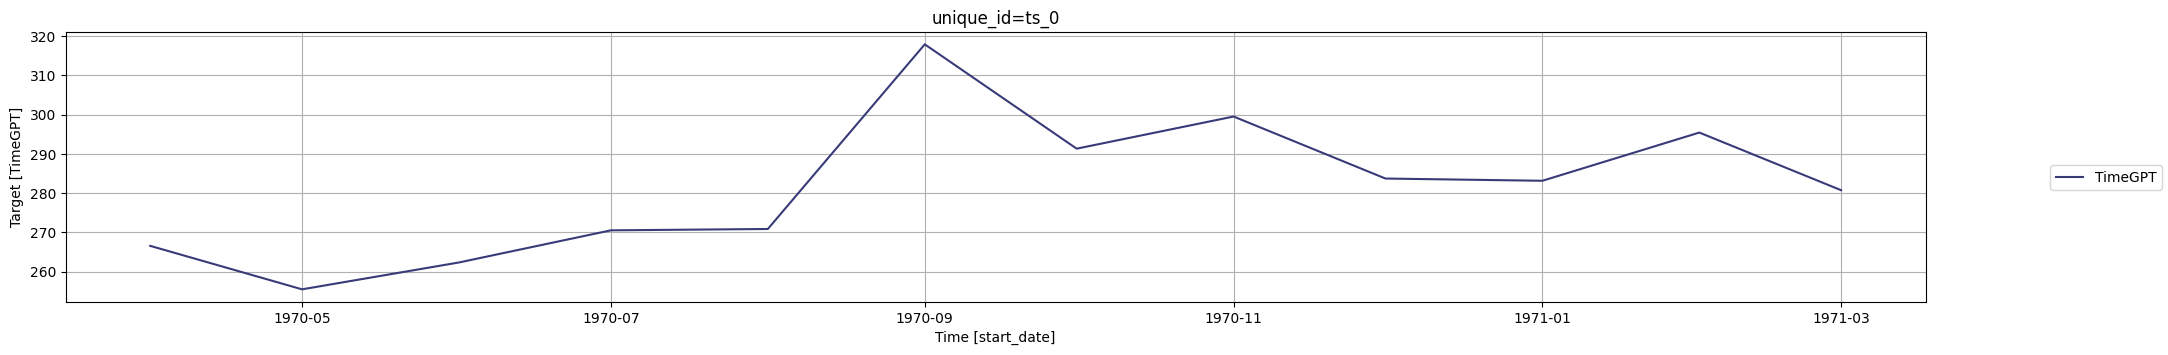

In [ ]:
timegpt.plot(fs_df,time_col='start_date', target_col='TimeGPT')

GPU USAGE FORECASR FOR NEXT 1 YEAR

In [ ]:
fn_df = timegpt.forecast(df=df, h=12, freq='MS', time_col='start_date', target_col='gpu_wrk_util')
fn_df.head()

start_date   TimeGPT
0  1970-04-01  8.819507
1  1970-05-01  9.053301
2  1970-06-01  9.341403
3  1970-07-01  9.244068
4  1970-08-01  8.960285

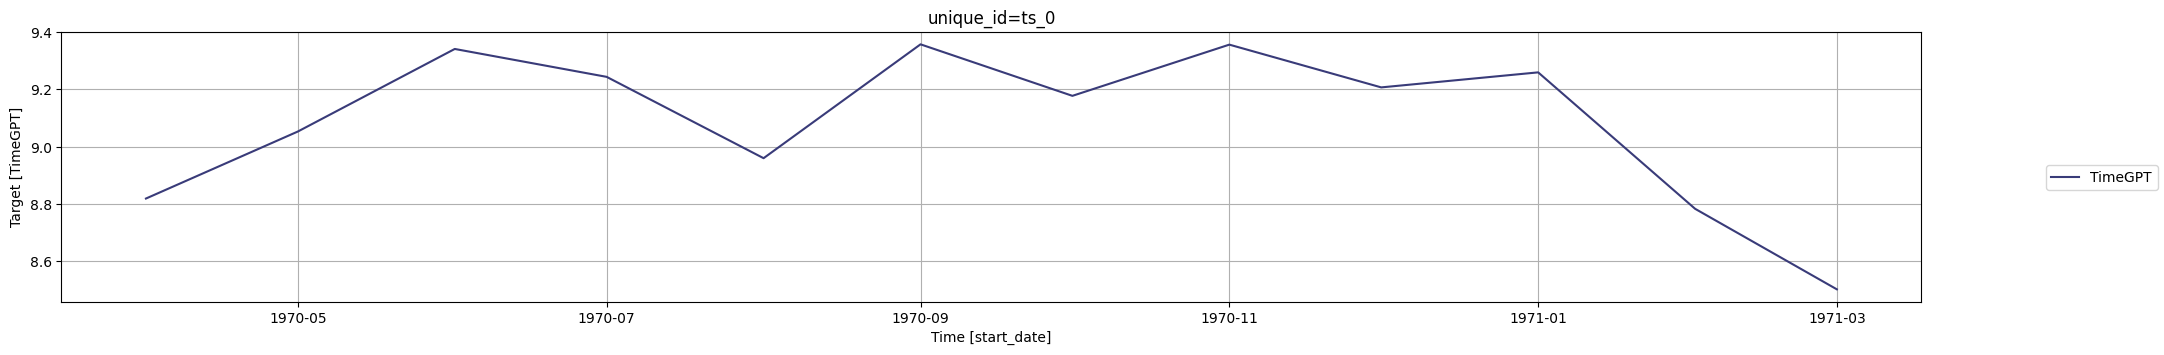

In [ ]:
timegpt.plot(fn_df,time_col='start_date', target_col='TimeGPT')

CPU FORECAST FOR next day

In [ ]:
fwc_df = timegpt.forecast(df=df, h=24, freq='h', time_col='start_date', target_col='gpu_wrk_util')
fwc_df.head()

start_date    TimeGPT
0  1970-03-06 07:00:00  14.031570
1  1970-03-06 08:00:00  12.980084
2  1970-03-06 09:00:00  12.693854
3  1970-03-06 10:00:00  12.989601
4  1970-03-06 11:00:00  12.417252

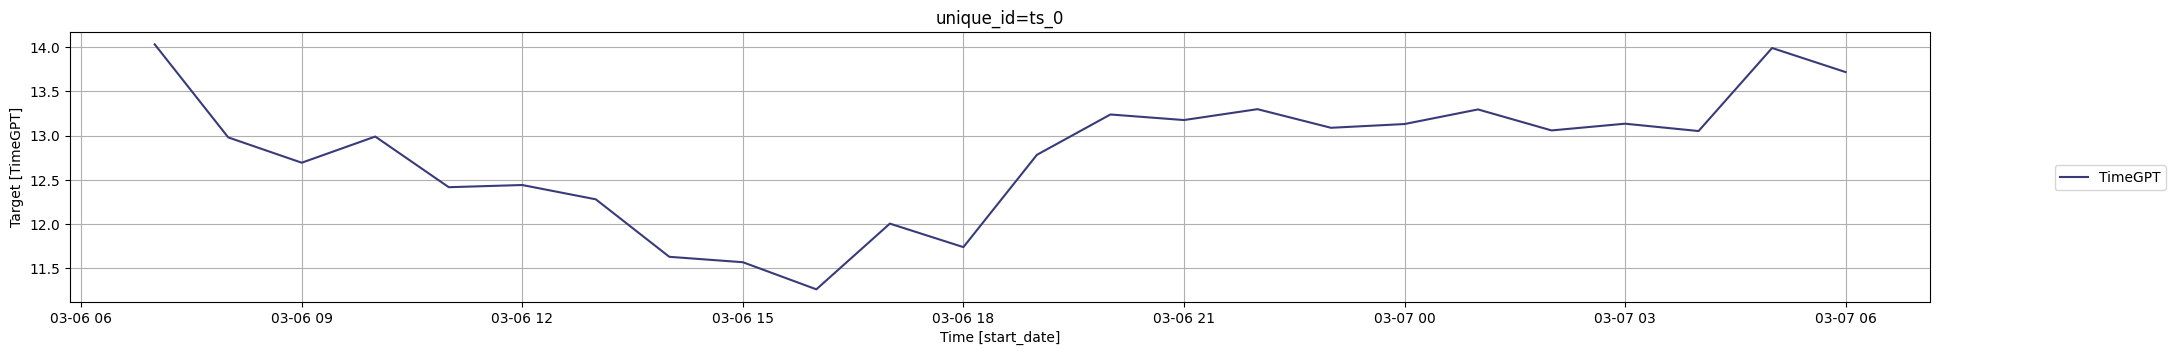

In [ ]:
timegpt.plot(fwc_df,time_col='start_date', target_col='TimeGPT')

GPU FORECAST FOR next day

In [ ]:
fw_df = timegpt.forecast(df=df, h=24, freq='h', time_col='start_date', target_col='gpu_wrk_util')
fw_df.head()

start_date    TimeGPT
0  1970-03-06 07:00:00  14.031570
1  1970-03-06 08:00:00  12.980084
2  1970-03-06 09:00:00  12.693854
3  1970-03-06 10:00:00  12.989601
4  1970-03-06 11:00:00  12.417252

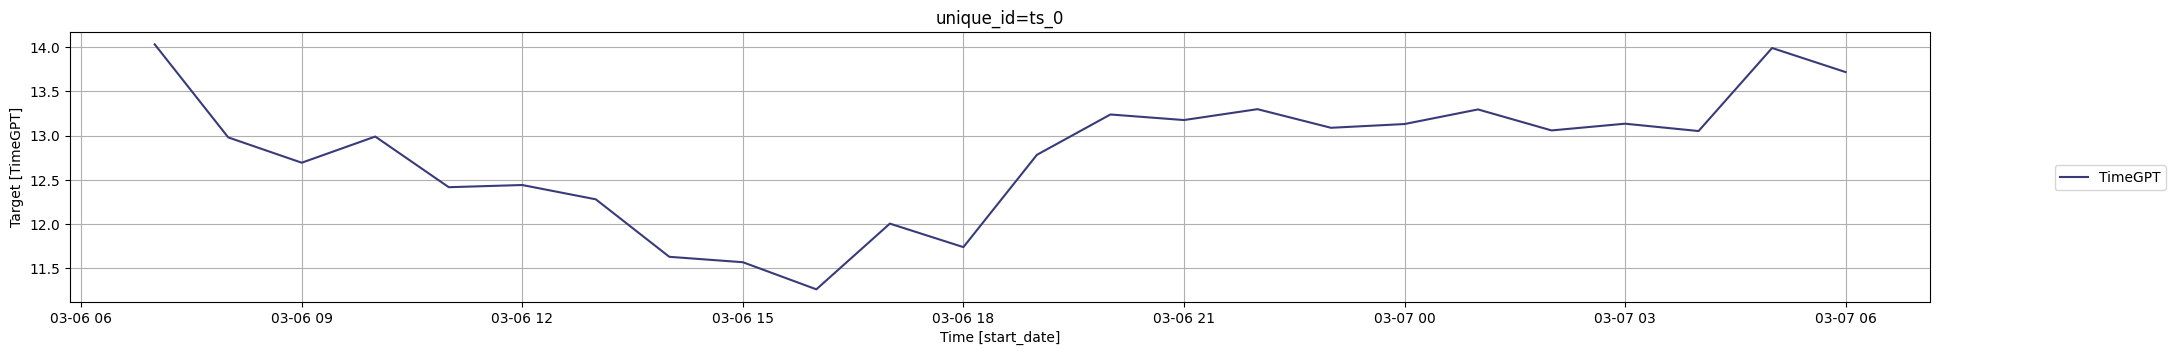

In [ ]:
timegpt.plot(fw_df,time_col='start_date', target_col='TimeGPT')

GPU FORECAST FOR A MONTH

In [ ]:
fwc_df = timegpt.forecast(df=df, h=30, freq='D', time_col='start_date', target_col='gpu_wrk_util')
fwc_df.head()

start_date   TimeGPT
0  1970-03-07  9.295858
1  1970-03-08  8.767878
2  1970-03-09  8.748566
3  1970-03-10  8.917445
4  1970-03-11  8.652326

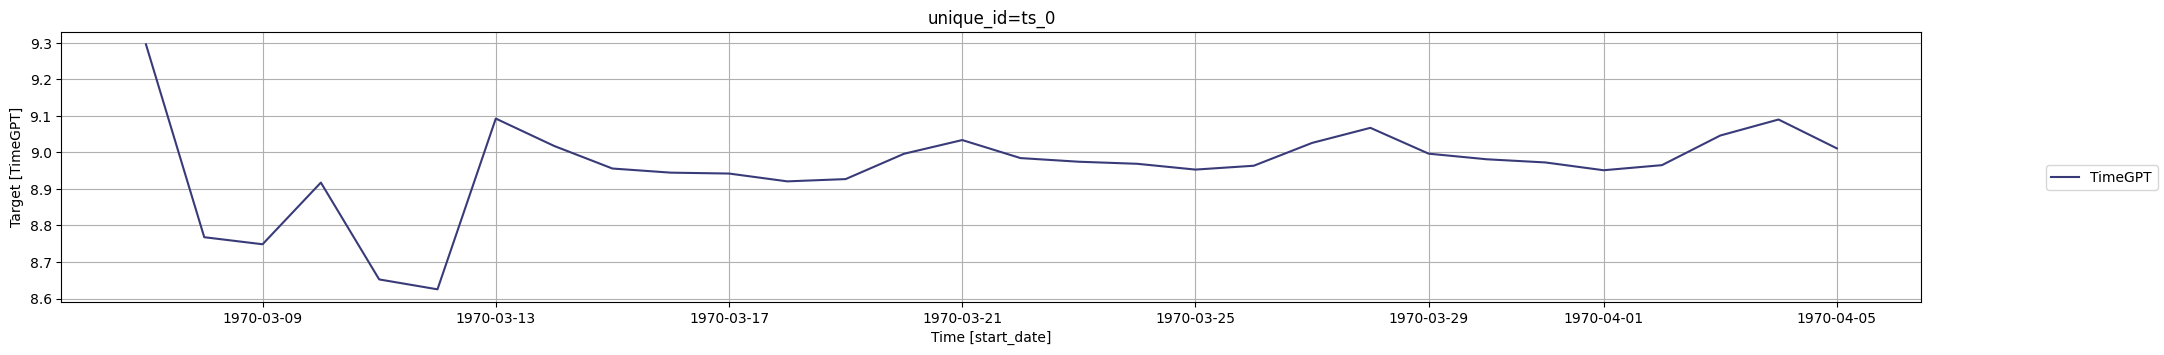

In [ ]:
timegpt.plot(fwc_df,time_col='start_date', target_col='TimeGPT')

CPU FORECAST FOR A MONTH

In [ ]:
fwc_df = timegpt.forecast(df=df, h=30, freq='D', time_col='start_date', target_col='cpu_usage')
fwc_df.head()

start_date     TimeGPT
0  1970-03-07  254.050369
1  1970-03-08  246.941147
2  1970-03-09  247.168198
3  1970-03-10  248.413147
4  1970-03-11  240.376373

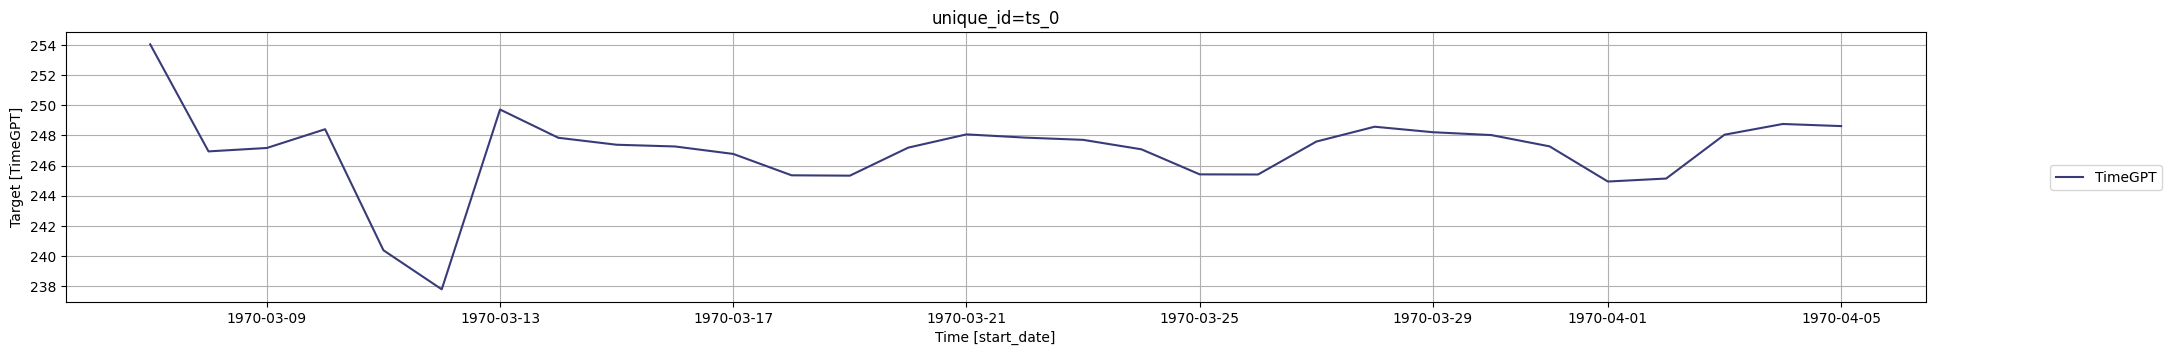

In [ ]:
timegpt.plot(fwc_df,time_col='start_date', target_col='TimeGPT')

CPU FORECAST FOR A WEEK

In [ ]:
fwc_df = timegpt.forecast(df=df, h=7, freq='D', time_col='start_date', target_col='cpu_usage')
fwc_df.head()

start_date     TimeGPT
0  1970-03-07  254.050369
1  1970-03-08  246.941147
2  1970-03-09  247.168198
3  1970-03-10  248.413147
4  1970-03-11  240.376373

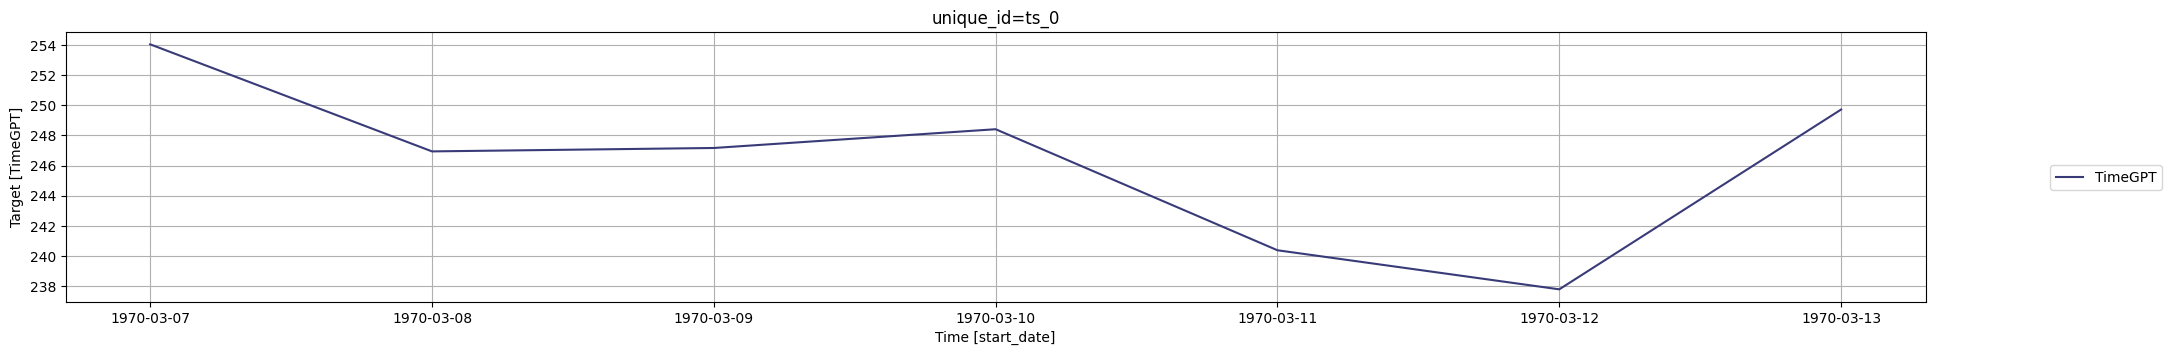

In [ ]:
timegpt.plot(fwc_df,time_col='start_date', target_col='TimeGPT')

GPU FORECAST FOR A WEEK

In [ ]:
fwc_df = timegpt.forecast(df=df, h=7, freq='D', time_col='start_date', target_col='gpu_wrk_util')
fwc_df.head()

start_date   TimeGPT
0  1970-03-07  9.295858
1  1970-03-08  8.767878
2  1970-03-09  8.748566
3  1970-03-10  8.917445
4  1970-03-11  8.652326

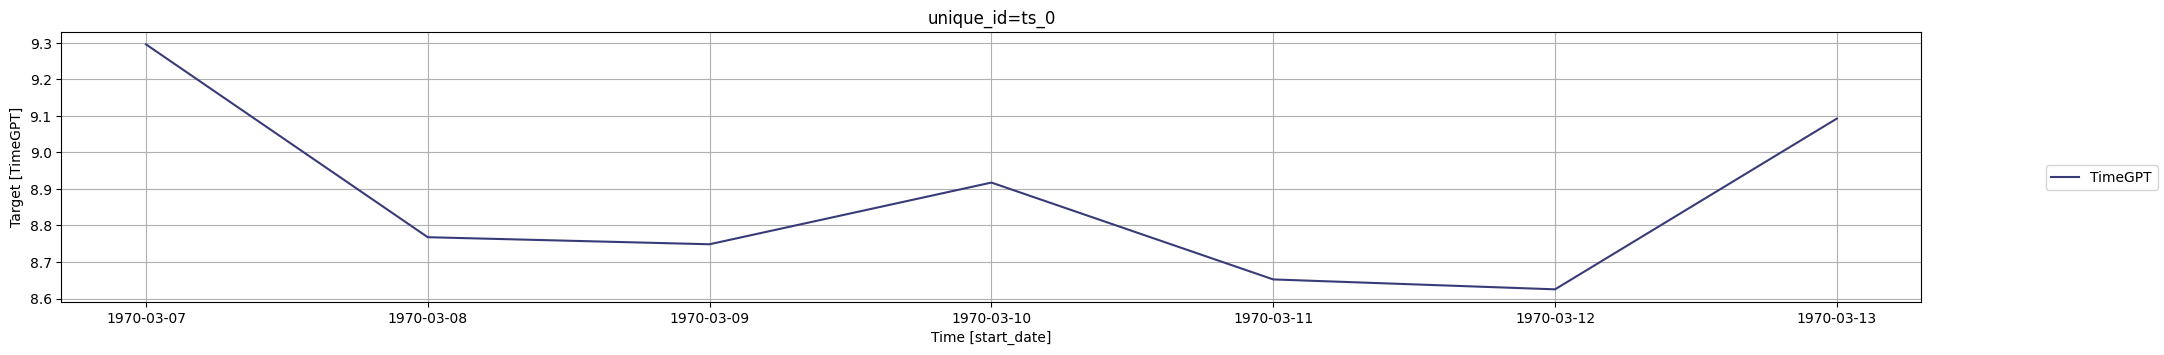

In [ ]:
timegpt.plot(fwc_df,time_col='start_date', target_col='TimeGPT')

cpu forecast for a hour

In [ ]:
fwc_df = timegpt.forecast(df=df, h=60, freq='min', time_col='start_date', target_col='cpu_usage')
fwc_df.head()

start_date     TimeGPT
0  1970-03-06 06:10:00  305.601654
1  1970-03-06 06:11:00  353.515503
2  1970-03-06 06:12:00  378.860443
3  1970-03-06 06:13:00  282.652435
4  1970-03-06 06:14:00  337.562195

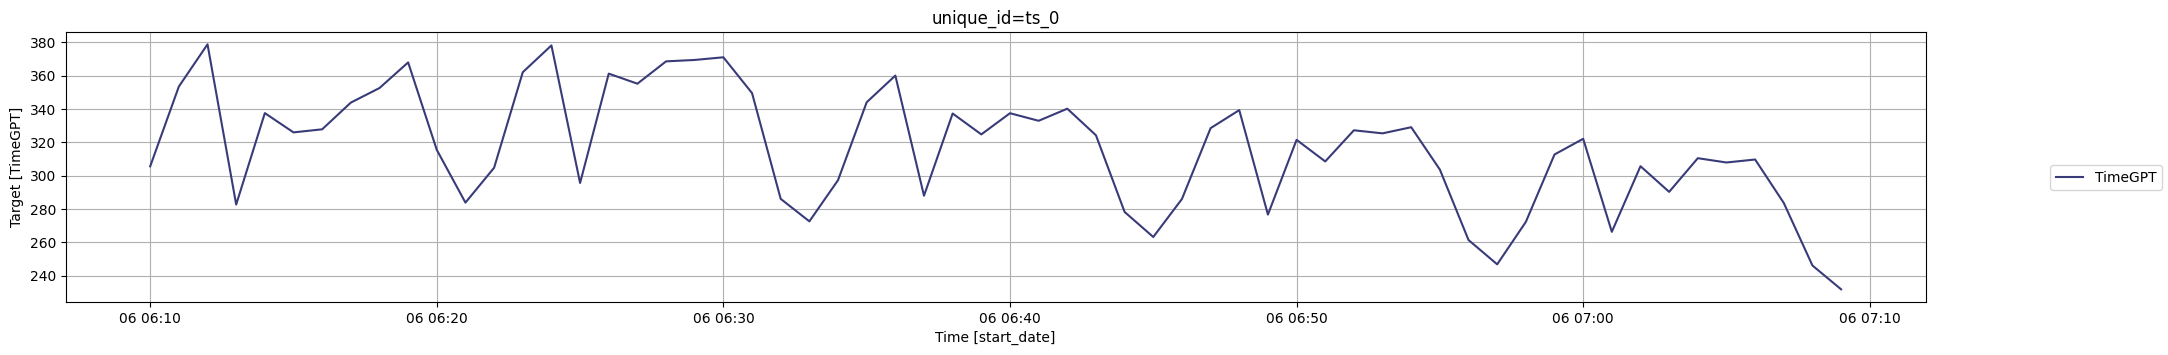

In [ ]:
timegpt.plot(fwc_df,time_col='start_date', target_col='TimeGPT')

GPU FORECAST FOR A HOUR

In [ ]:
fwc_df = timegpt.forecast(df=df, h=60, freq='min', time_col='start_date', target_col='gpu_wrk_util')
fwc_df.head()

start_date    TimeGPT
0  1970-03-06 06:10:00  11.188914
1  1970-03-06 06:11:00  12.943172
2  1970-03-06 06:12:00  13.871120
3  1970-03-06 06:13:00  10.348680
4  1970-03-06 06:14:00  12.359076

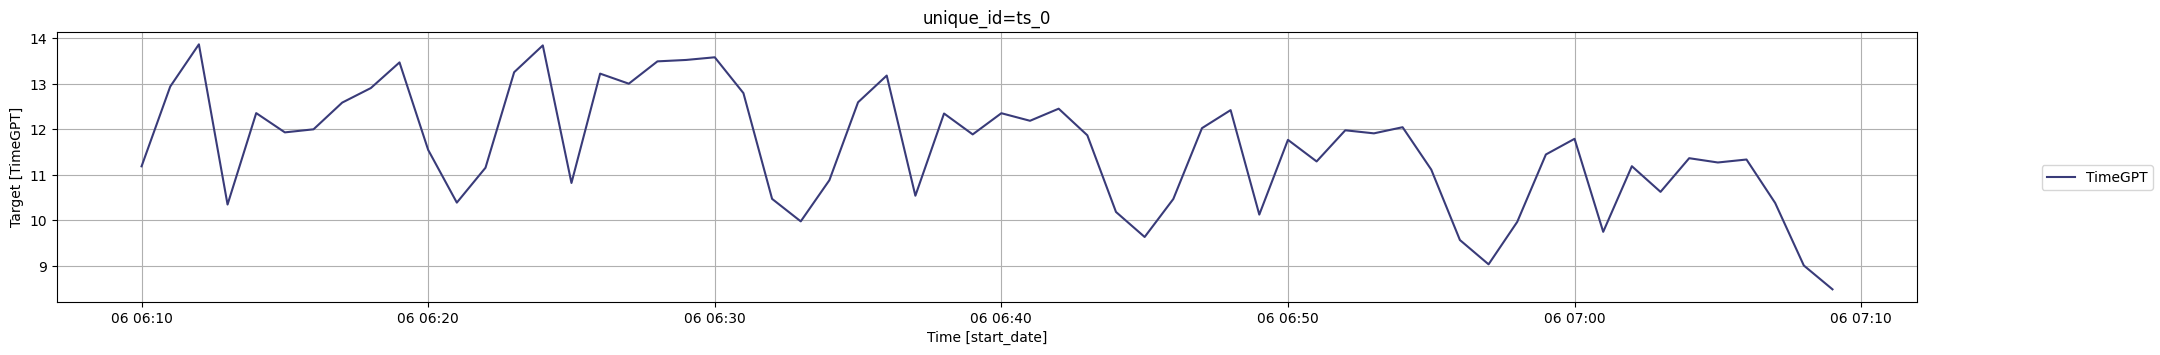

In [ ]:
timegpt.plot(fwc_df,time_col='start_date', target_col='TimeGPT')